<a href="https://colab.research.google.com/github/Abdouramane-qr/Classroom/blob/main/PROJET_STAT_PROBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
%ls /content/gdrive/MyDrive/gdrive/

dataset_anon.csv  MyDrive/


In [7]:
!pip install prince
!pip install gower

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import prince
from scipy import stats
from scipy.stats import chi2_contingency

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [9]:
df = pd.read_csv('/content/gdrive/MyDrive/gdrive/dataset_anon.csv')

In [10]:
print(df.head())

       Y1          Y2 experiment_date    feat_A  feat_B  feat_C      feat_D  \
0  4.1160  707.466667      2017-08-27  1.291545     NaN     NaN  367.276355   
1  4.0572  827.400000      2017-03-24  1.291545     NaN     NaN  375.817665   
2  5.3228  811.533333      2017-03-10  0.604668     NaN     NaN  193.603040   
3  4.6396  684.600000      2017-03-10       NaN     NaN     NaN   45.553656   
4  3.9004  723.800000      2017-08-29  2.665300     NaN     NaN  726.011399   

     feat_E    feat_F       feat_G  ... feat_M    feat_N feat_O feat_P  \
0  1.822915  4.889539        myers  ...    lit       NaN  proxy    NaN   
1  1.822915  4.889539  competition  ...    lit  mountain  proxy    NaN   
2  1.822915  4.889539  competition  ...    lit  mountain  proxy    NaN   
3  5.468744  0.000000  competition  ...    lit       NaN  proxy    NaN   
4  1.822915  4.889539        myers  ...    lit  mountain  proxy    NaN   

       feat_Q feat_R   feat_S   feat_T     feat_U     feat_V  
0  conference    

# 1. Analyse exploratoire univari√©e et bivari√©e

# Conversion des types de donn√©es

In [12]:
# Conversion de la date
df['experiment_date'] = pd.to_datetime(df['experiment_date'])


In [13]:
# Identification des colonnes par type
numeric_features = ['feat_A', 'feat_B', 'feat_C', 'feat_D', 'feat_E', 'feat_F']
categorical_features = [f'feat_{c}' for c in 'GHIJKLMNOPQRSTUV']

# Gestion des valeurs manquantes

In [14]:
# - Remplacer 'NULL' par NaN pour les features num√©riques
df[numeric_features] = df[numeric_features].replace('NULL', np.nan)

In [15]:
# - Convertir les num√©riques en float
for col in numeric_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [16]:
df.columns

Index(['Y1', 'Y2', 'experiment_date', 'feat_A', 'feat_B', 'feat_C', 'feat_D',
       'feat_E', 'feat_F', 'feat_G', 'feat_H', 'feat_I', 'feat_J', 'feat_K',
       'feat_L', 'feat_M', 'feat_N', 'feat_O', 'feat_P', 'feat_Q', 'feat_R',
       'feat_S', 'feat_T', 'feat_U', 'feat_V'],
      dtype='object')

Pour chaque caract√©ristique quantitative (par exemple feat_A), nous avons cr√©√© une nouvelle colonne nomm√©e `feat_A_applicable` (ou similaire) qui prend :
   - la valeur 1 si la caract√©ristique feat_A √©tait applicable (c'est-√†-dire qu'il y avait une valeur num√©rique, pas un NaN √† l'origine)
   - la valeur 0 si la caract√©ristique feat_A n'√©tait pas applicable (c'est-√†-dire qu'elle √©tait initialement NULL, donc devenue NaN puis remplac√©e par 0)


In [17]:
# - Cr√©er des colonnes binaires d'applicabilit√© pour les variables num√©riques  (1 si applicable, 0 sinon)
for col in numeric_features:
    df[f'{col}_applicable'] = df[col].notnull().astype(int)

In [18]:
# - Gestion des cat√©gorielles : remplacer NULL par 'N/A'
df[categorical_features] = df[categorical_features].fillna('N/A')

Une colonne constante n'apporte aucune information utile pour l'analyse ou la mod√©lisation puisque sa valeur est la m√™me partout.

In [19]:
df.columns

Index(['Y1', 'Y2', 'experiment_date', 'feat_A', 'feat_B', 'feat_C', 'feat_D',
       'feat_E', 'feat_F', 'feat_G', 'feat_H', 'feat_I', 'feat_J', 'feat_K',
       'feat_L', 'feat_M', 'feat_N', 'feat_O', 'feat_P', 'feat_Q', 'feat_R',
       'feat_S', 'feat_T', 'feat_U', 'feat_V', 'feat_A_applicable',
       'feat_B_applicable', 'feat_C_applicable', 'feat_D_applicable',
       'feat_E_applicable', 'feat_F_applicable'],
      dtype='object')

In [20]:
# V√©rification des colonnes constantes
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print(f"Colonnes constantes: {constant_cols}")

Colonnes constantes: ['feat_E_applicable', 'feat_F_applicable']


In [21]:
# Extraction des features temporelles
df['experiment_year'] = df['experiment_date'].dt.year
df['experiment_month'] = df['experiment_date'].dt.month

In [22]:
# 5. Suppression des colonnes constantes
#constant_cols = []
#for col in df.columns:
#    if df[col].nunique() == 1:
#        constant_cols.append(col)
#        print(f"Colonne constante d√©tect√©e: {col} - Valeur unique: {df[col].iloc[0]}")

In [23]:
# 5. V√©rification finale
print("\n=== R√©sum√© des donn√©es nettoy√©es ===")
print(f"Shape: {df.shape}")
print(f"Types:\n{df.dtypes}")
print(f"\nValeurs manquantes:\n{df.isnull().sum()}")
print(f"\nExemple de donn√©es:\n{df.head(2)}")


=== R√©sum√© des donn√©es nettoy√©es ===
Shape: (163, 33)
Types:
Y1                          float64
Y2                          float64
experiment_date      datetime64[ns]
feat_A                      float64
feat_B                      float64
feat_C                      float64
feat_D                      float64
feat_E                      float64
feat_F                      float64
feat_G                       object
feat_H                       object
feat_I                       object
feat_J                       object
feat_K                       object
feat_L                       object
feat_M                       object
feat_N                       object
feat_O                       object
feat_P                       object
feat_Q                       object
feat_R                       object
feat_S                       object
feat_T                       object
feat_U                       object
feat_V                       object
feat_A_applicable             int6

In [24]:
# Suppression des colonnes constantes (DERNIER)
#constant_cols = [col for col in df.columns if df[col].nunique() == 1]
#print(f"Colonnes constantes √† supprimer: {constant_cols}")
#df = df.drop(columns=constant_cols)  # Suppression finale

In [25]:
# Configuration initiale
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# 1. Analyse Univari√©e

> Ajouter une citation



**Quantitatives :**

Distribution des performances (Y1, Y2) : Asym√©trie, valeurs extr√™mes

Analyse des features num√©riques : Valeurs centrales, dispersion

Taux d'applicabilit√© : % de conceptions o√π chaque feature est pertinente

In [26]:
# Analyse des variables quantitatives
quant_vars = ['Y1', 'Y2'] + [f'feat_{c}' for c in 'ABCDEF']
print("\nStatistiques descriptives (quantitatives):")
print(df[quant_vars].describe().T)


Statistiques descriptives (quantitatives):
        count        mean         std         min         25%         50%  \
Y1      163.0    4.280316    1.373060    1.234800    3.224200    4.298000   
Y2      163.0  717.154008  211.010163  282.800000  580.066667  696.733333   
feat_A  153.0    1.257822    0.488035    0.318019    1.261258    1.291545   
feat_B   71.0  476.301304  155.263428  244.583133  314.464028  552.145344   
feat_C   36.0    2.864713    0.508129    1.550790    3.022871    3.092007   
feat_D  135.0  347.656648  151.274713   42.706553  337.381768  368.699907   
feat_E  163.0    2.035402    0.754947    0.000000    1.822915    1.822915   
feat_F  163.0    4.979531    1.533980    0.000000    4.889539    4.889539   

               75%          max  
Y1        5.230960    10.099600  
Y2      820.575000  1600.666667  
feat_A    1.291545     3.220210  
feat_B  626.986920   689.318953  
feat_C    3.092007     3.475982  
feat_D  375.817665   882.602093  
feat_E    1.822915     5

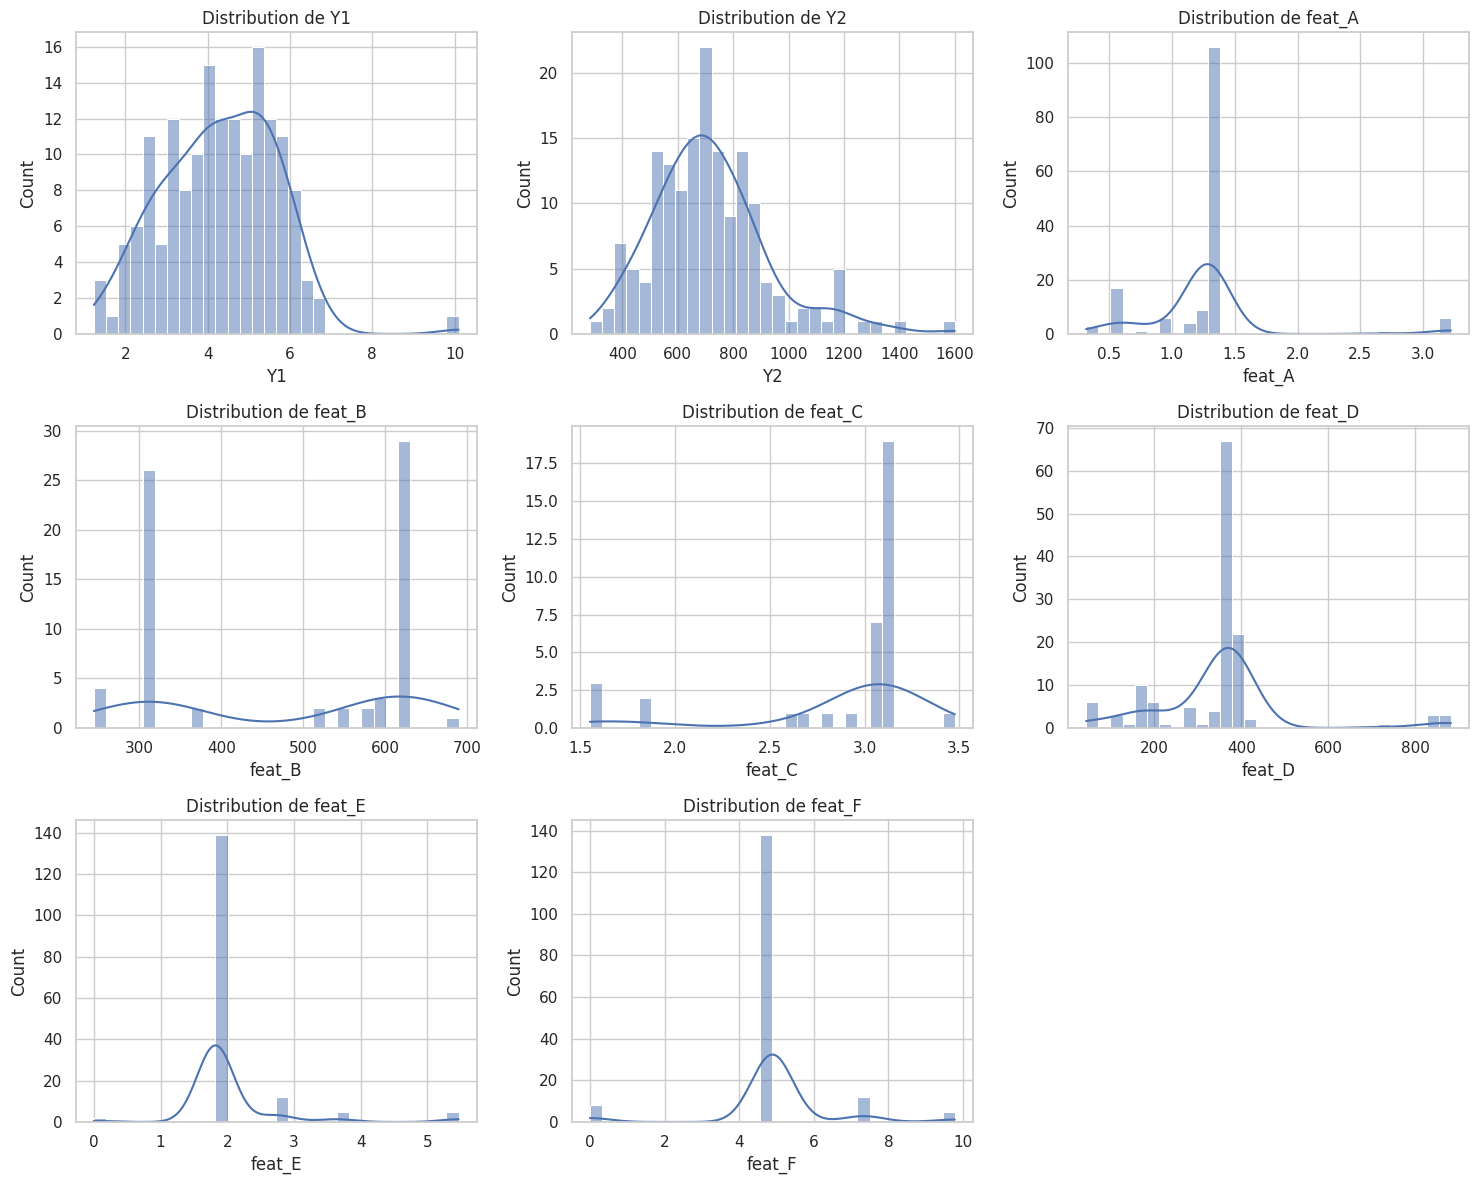

In [28]:
## Visualisation distributions quantitatives

# Nombre de variables quantitatives
n_vars = len(quant_vars)

# D√©finir le nombre de colonnes (par exemple, 3)
n_cols = 3
n_rows = math.ceil(n_vars / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))

# S'assurer que axes est un tableau plat (m√™me s'il n'y a qu'une seule ligne)
axes = axes.flatten()

# Tracer les histogrammes
for i, var in enumerate(quant_vars):
    sns.histplot(df[var], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution de {var}')

# Supprimer les axes inutilis√©s
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('distributions_quantitatives.png')
plt.show()


l‚Äôanalyse univari√©e des variables num√©riques (Y1, Y2, feat_A, feat_D, feat_E, feat_F, etc.) montre que
Y1 : centr√©e autour de 4 √† 5, distribution l√©g√®rement asym√©trique.

Y2 : valeurs concentr√©es autour de 700‚Äì850, avec un pic marqu√©.

feat_A √† feat_F : des distributions vari√©es :
Certaines sont tr√®s concentr√©es (peu de variance) et d‚Äôautres ont des valeurs extr√™mes (outliers probables).

In [29]:
# Analyse des applicabilit√©s
# Liste dynamique de colonnes existantes contenant "applicable"
app_vars = [col for col in df.columns if 'applicable' in col and df[col].dtype != 'object']
print("\nTaux d'applicabilit√© des features :")
print(df[app_vars].mean().sort_values(ascending=False))
print("Colonnes d'applicabilit√© utilis√©es :", app_vars)


Taux d'applicabilit√© des features :
feat_E_applicable    1.000000
feat_F_applicable    1.000000
feat_A_applicable    0.938650
feat_D_applicable    0.828221
feat_B_applicable    0.435583
feat_C_applicable    0.220859
dtype: float64
Colonnes d'applicabilit√© utilis√©es : ['feat_A_applicable', 'feat_B_applicable', 'feat_C_applicable', 'feat_D_applicable', 'feat_E_applicable', 'feat_F_applicable']


**Analyse D√©taill√©e des Variables Quantitatives**
1. Indicateurs de Performance (Y1 et Y2)
Y1 (Performance 1) :

Moyenne = 4.28 ¬± 1.37

√âtendue importante : 1.23 √† 10.10 (diff√©rence de 8.87)

Distribution asym√©trique √† droite (moyenne > m√©diane)

50% des valeurs entre 3.22 et 5.23 (IQR = 2.01)

Y2 (Performance 2) :

Moyenne = 717.15 ¬± 211.01

Variation extr√™me : 282.80 √† 1600.67 (rapport 1:5.7)

Distribution bimodale suspect√©e (√©cart-type √©lev√©)

Valeurs centrales concentr√©es : m√©diane(696.73) proche de Q1(580.07)

2. Caract√©ristiques Techniques
feat_A :

Valeur typique = 1.29 (m√©diane)

Faible dispersion : 75% des valeurs entre 1.26-1.29

Valeurs extr√™mes : min(0.32) et max(3.22) √©loign√©s

feat_B :

Applicabilit√© limit√©e (43.5% des cas)

Distribution bimodale : pics √† 314.46 et 626.99

Asym√©trie gauche (moyenne(476.30) < m√©diane(552.15))

feat_C :

Rarement applicable (22.1%)

Valeurs concentr√©es autour de 3.09 (Q3-m√©diane)

Minimum(1.55) significativement plus bas

feat_D :

Haut taux d'applicabilit√© (82.8%)

Grande variabilit√© : √©cart-type(151.27) ‚âà 43% de la moyenne

Distribution uniforme suspect√©e (Q1=337.38, Q3=375.82)

feat_E :

Valeur modale dominante : 1.82 (50% des observations)

Pr√©sence de z√©ros (non applicables)

Valeurs extr√™mes jusqu'√† 5.47

feat_F :

Comportement similaire √† feat_E

Valeur dominante : 4.89 (50% des cas)
*Maximum(9.78) = 2√ó la valeur dominante*

**Cat√©gorielles :**

Fr√©quence des modalit√©s (top 5 par variable)

Taux de "N/A" (non applicables)

Distribution des ann√©es/mois d'exp√©rimentation

In [30]:
df.columns

Index(['Y1', 'Y2', 'experiment_date', 'feat_A', 'feat_B', 'feat_C', 'feat_D',
       'feat_E', 'feat_F', 'feat_G', 'feat_H', 'feat_I', 'feat_J', 'feat_K',
       'feat_L', 'feat_M', 'feat_N', 'feat_O', 'feat_P', 'feat_Q', 'feat_R',
       'feat_S', 'feat_T', 'feat_U', 'feat_V', 'feat_A_applicable',
       'feat_B_applicable', 'feat_C_applicable', 'feat_D_applicable',
       'feat_E_applicable', 'feat_F_applicable', 'experiment_year',
       'experiment_month'],
      dtype='object')

In [31]:
# Analyse des variables cat√©gorielles
cat_vars = [c for c in df.columns if c.startswith('feat_') and c not in quant_vars + app_vars] + ['experiment_year', 'experiment_month']

In [32]:
df[cat_vars].columns



Index(['feat_G', 'feat_H', 'feat_I', 'feat_J', 'feat_K', 'feat_L', 'feat_M',
       'feat_N', 'feat_O', 'feat_P', 'feat_Q', 'feat_R', 'feat_S', 'feat_T',
       'feat_U', 'feat_V', 'experiment_year', 'experiment_month'],
      dtype='object')


Top 5 des modalit√©s par variable cat√©gorielle:

feat_G:
feat_G
myers          0.539877
size           0.122699
les            0.116564
boots          0.073620
competition    0.067485
Name: proportion, dtype: float64


/tmp/ipython-input-33-1833028954.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=var, order=top_cats,palette='magma')


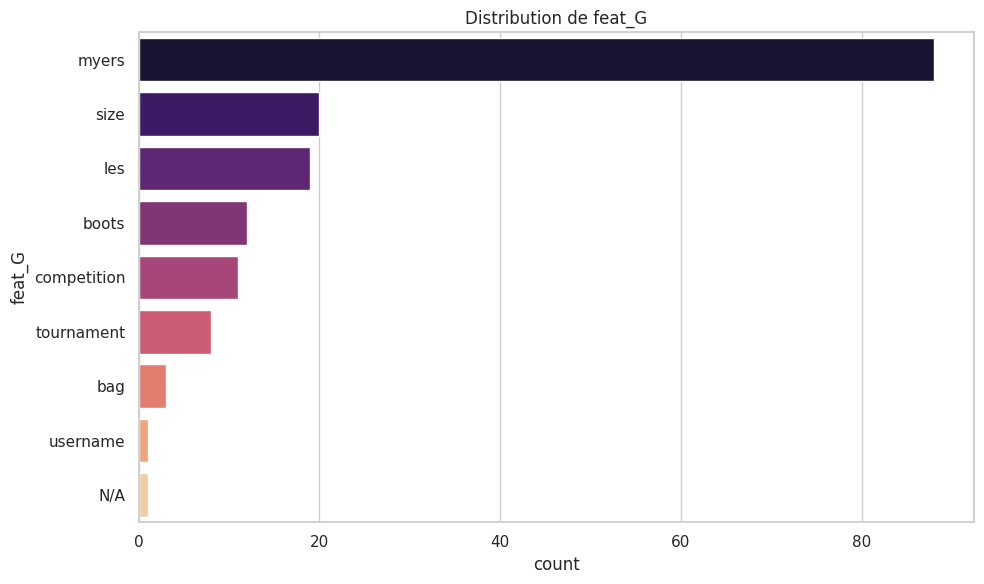


feat_H:
feat_H
N/A          0.680982
switching    0.134969
integrate    0.073620
tablets      0.073620
cow          0.024540
Name: proportion, dtype: float64


/tmp/ipython-input-33-1833028954.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=var, order=top_cats,palette='magma')


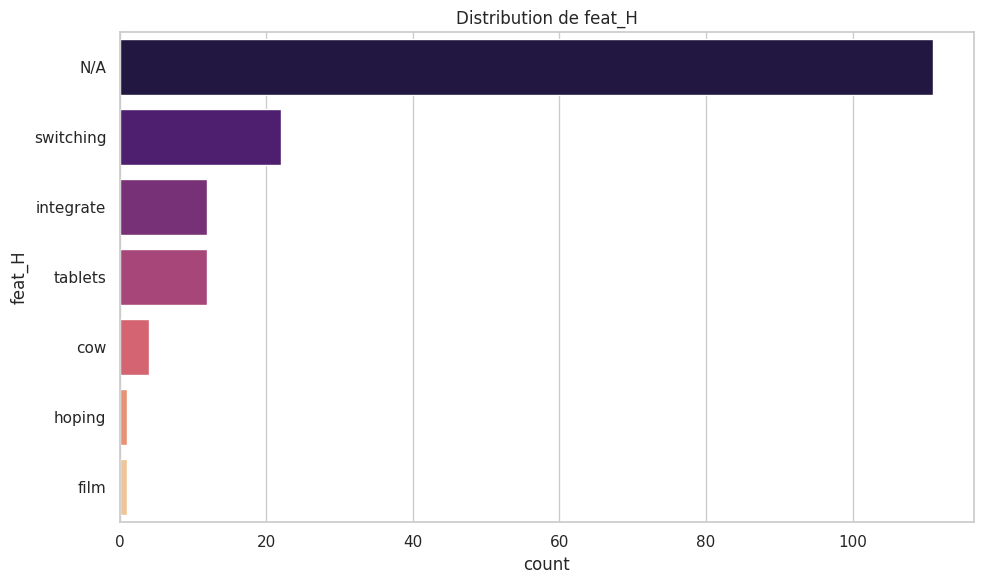


feat_I:
feat_I
N/A         0.760736
mfg         0.085890
cisco       0.061350
worth       0.055215
finances    0.024540
Name: proportion, dtype: float64


/tmp/ipython-input-33-1833028954.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=var, order=top_cats,palette='magma')


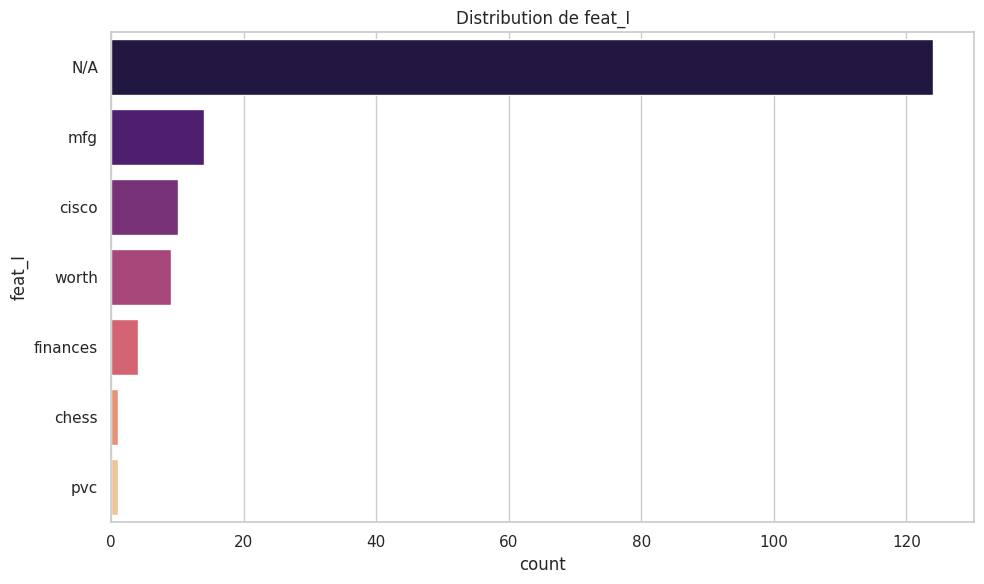


feat_J:
feat_J
gr         0.803681
issued     0.134969
N/A        0.036810
coleman    0.024540
Name: proportion, dtype: float64


/tmp/ipython-input-33-1833028954.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=var, order=top_cats,palette='magma')


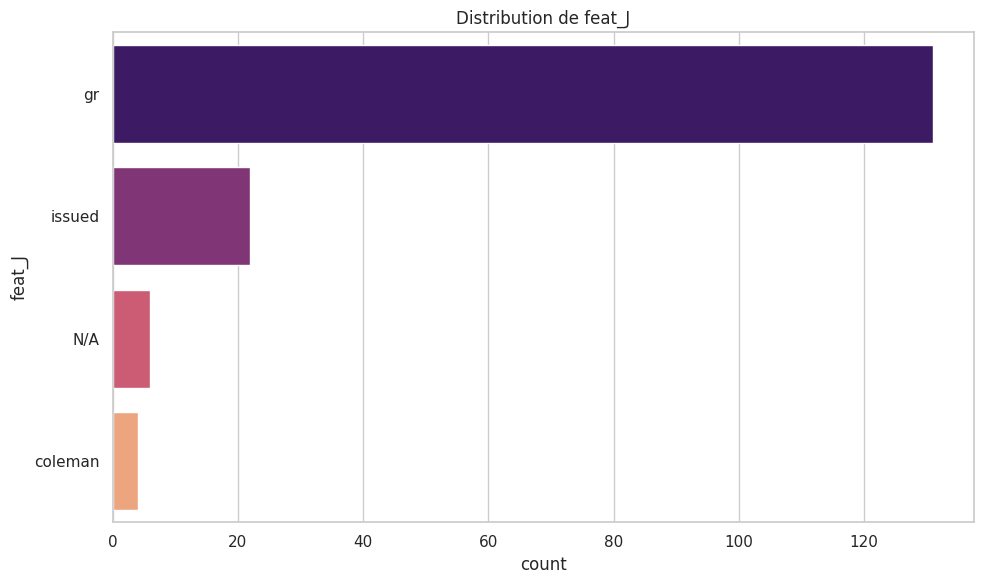


feat_K:
feat_K
eh       0.846626
enemy    0.092025
N/A      0.061350
Name: proportion, dtype: float64


/tmp/ipython-input-33-1833028954.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=var, order=top_cats,palette='magma')


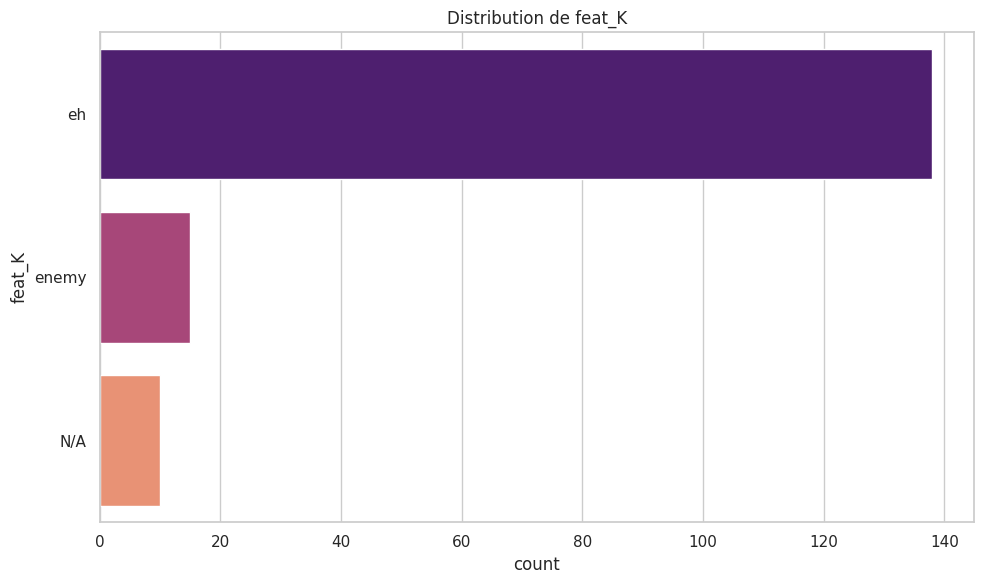


feat_L:
feat_L
numeric     0.552147
thinkpad    0.386503
N/A         0.061350
Name: proportion, dtype: float64


/tmp/ipython-input-33-1833028954.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=var, order=top_cats,palette='magma')


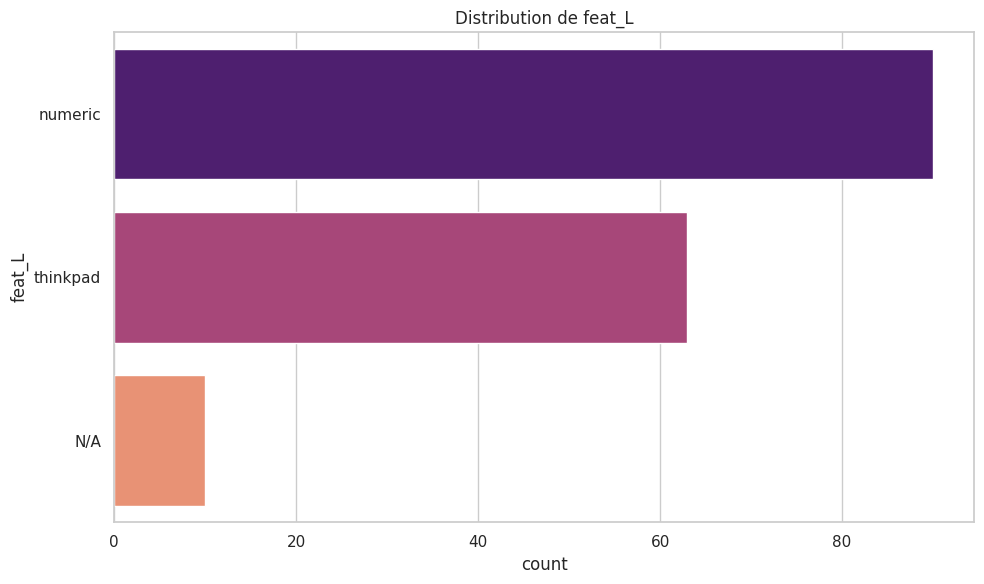


feat_M:
feat_M
legends    0.214724
belize     0.141104
lit        0.134969
wood       0.092025
N/A        0.092025
Name: proportion, dtype: float64


/tmp/ipython-input-33-1833028954.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=var, order=top_cats,palette='magma')


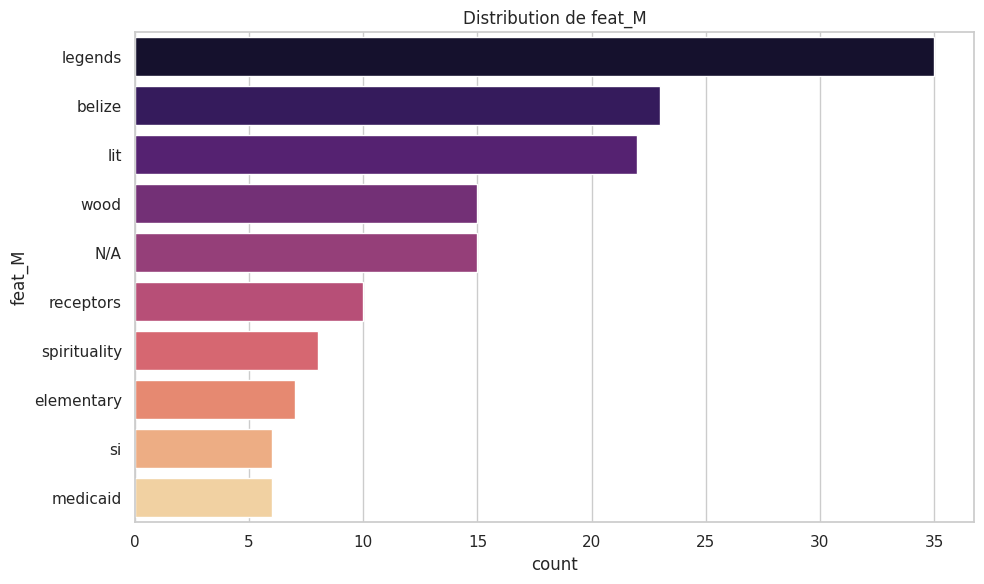


feat_N:
feat_N
N/A         0.460123
mountain    0.110429
waiver      0.110429
railroad    0.055215
cornwall    0.049080
Name: proportion, dtype: float64


/tmp/ipython-input-33-1833028954.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=var, order=top_cats,palette='magma')


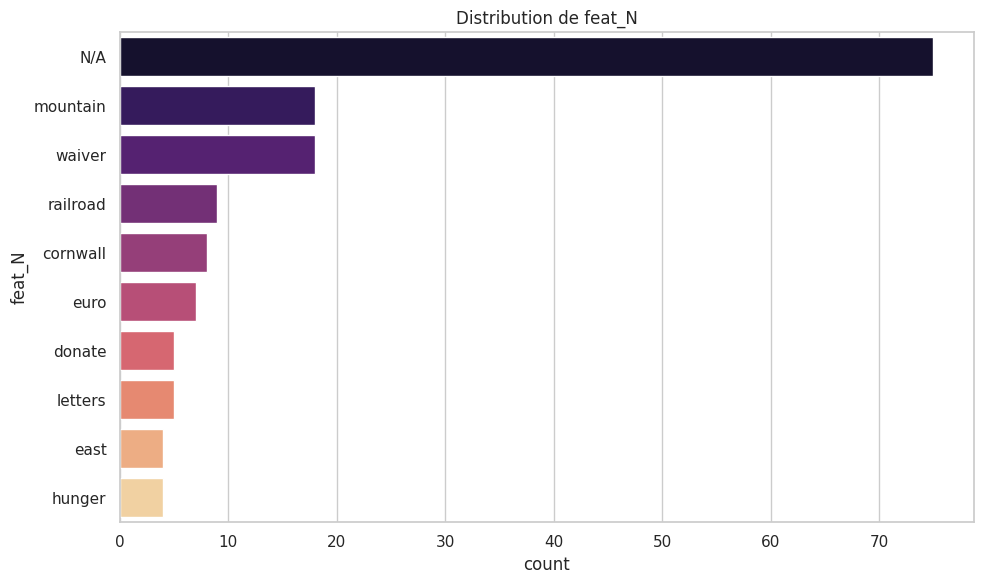


feat_O:
feat_O
N/A           0.760736
proxy         0.134969
remained      0.085890
authorized    0.018405
Name: proportion, dtype: float64


/tmp/ipython-input-33-1833028954.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=var, order=top_cats,palette='magma')


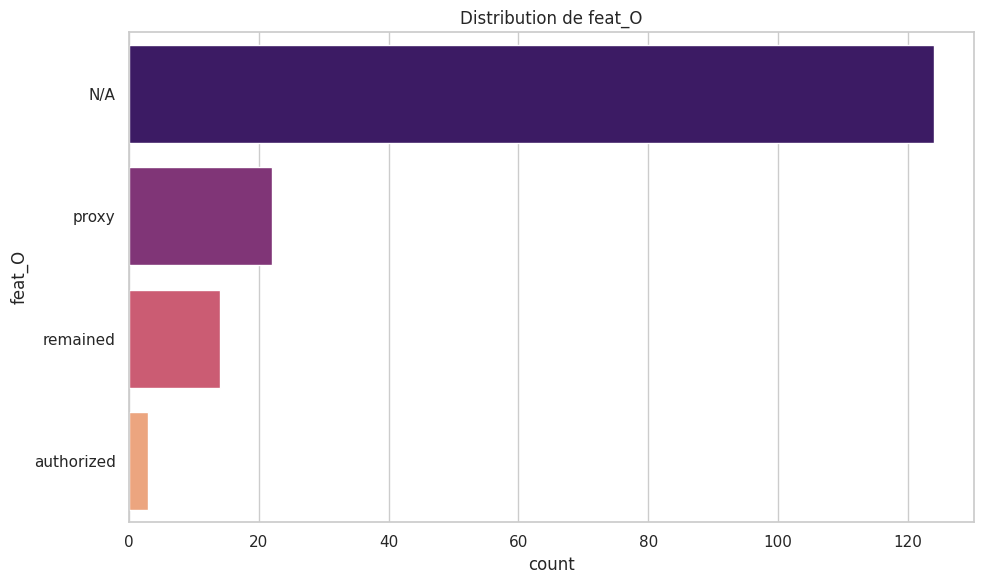


feat_P:
feat_P
N/A       0.840491
sees      0.079755
rage      0.067485
people    0.012270
Name: proportion, dtype: float64


/tmp/ipython-input-33-1833028954.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=var, order=top_cats,palette='magma')


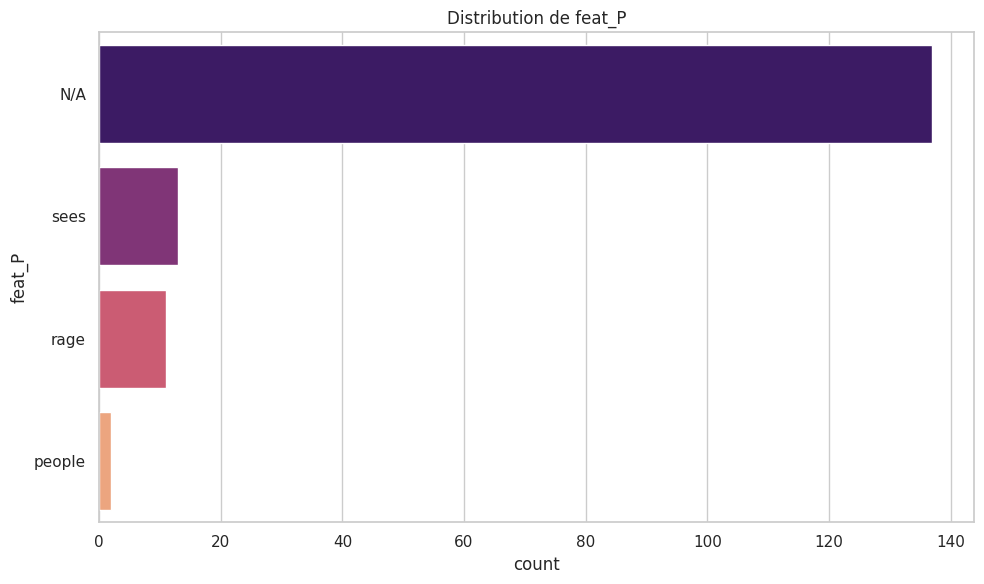


feat_Q:
feat_Q
until         0.257669
prairie       0.226994
conference    0.171779
applied       0.159509
N/A           0.134969
Name: proportion, dtype: float64


/tmp/ipython-input-33-1833028954.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=var, order=top_cats,palette='magma')


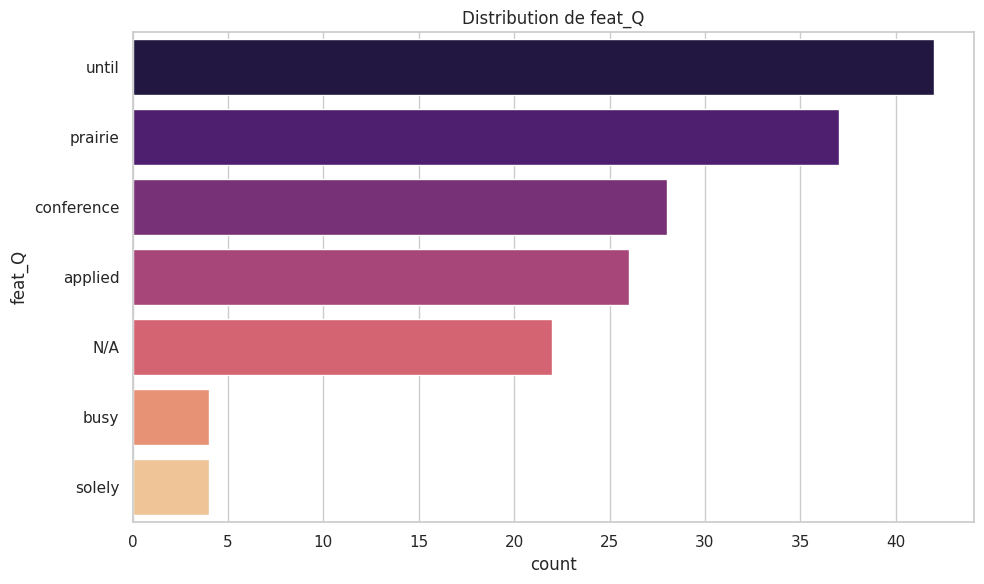


feat_R:
feat_R
N/A          0.453988
speed        0.190184
backup       0.184049
last         0.134969
aerospace    0.036810
Name: proportion, dtype: float64


/tmp/ipython-input-33-1833028954.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=var, order=top_cats,palette='magma')


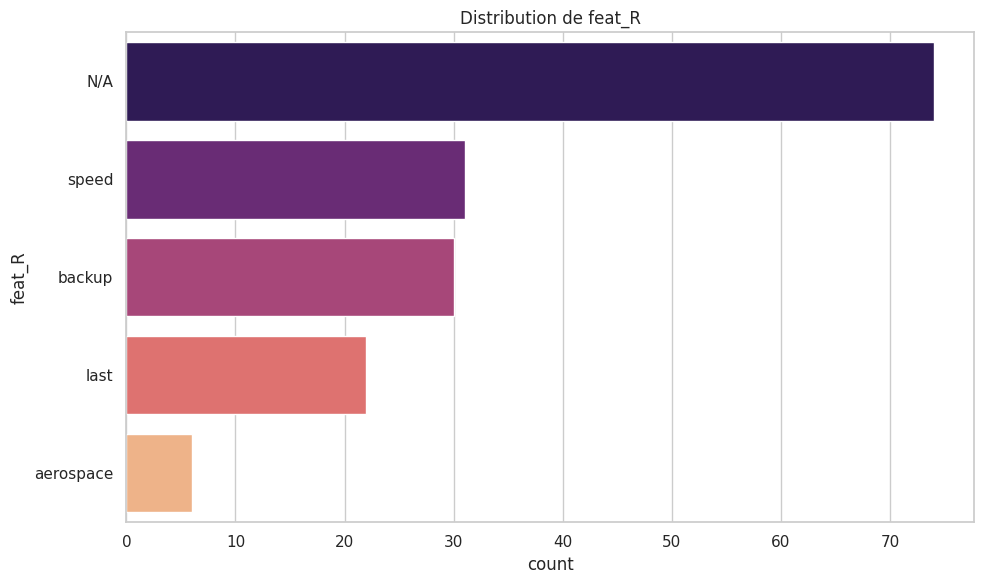


feat_S:
feat_S
creator    0.96319
centre     0.02454
N/A        0.01227
Name: proportion, dtype: float64


/tmp/ipython-input-33-1833028954.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=var, order=top_cats,palette='magma')


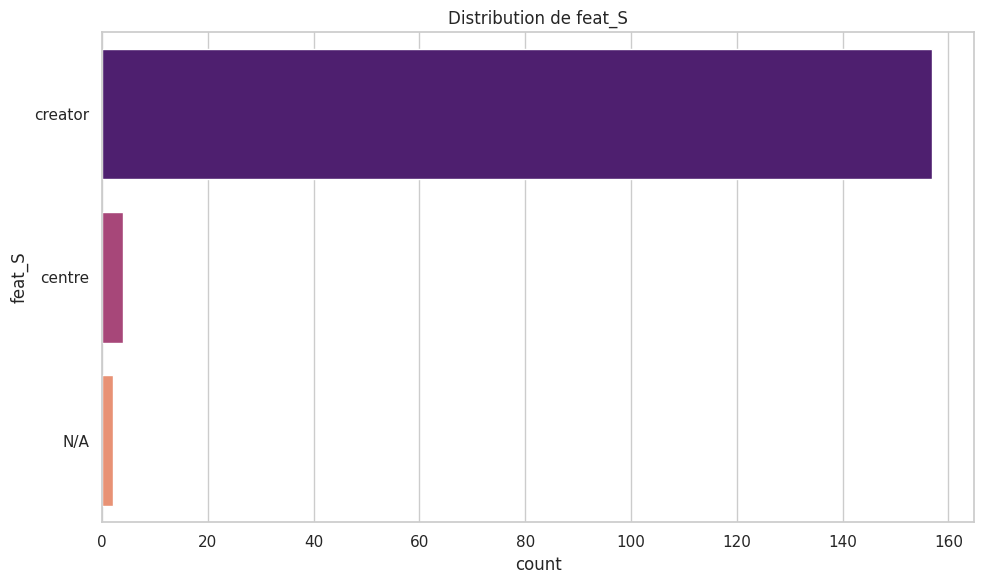


feat_T:
feat_T
dancing    0.92638
N/A        0.04908
chi        0.02454
Name: proportion, dtype: float64


/tmp/ipython-input-33-1833028954.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=var, order=top_cats,palette='magma')


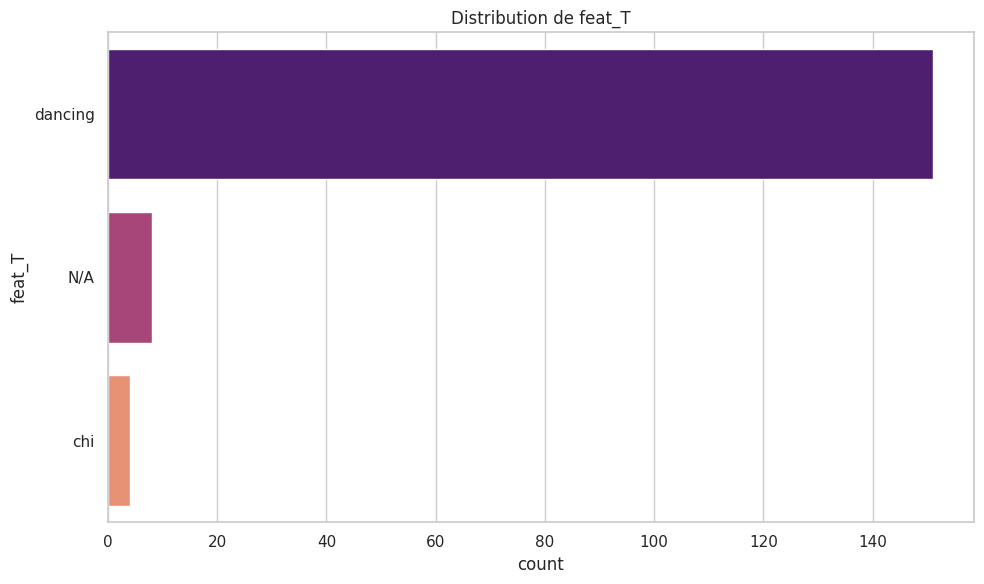


feat_U:
feat_U
enquiry      0.509202
renewable    0.398773
N/A          0.092025
Name: proportion, dtype: float64


/tmp/ipython-input-33-1833028954.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=var, order=top_cats,palette='magma')


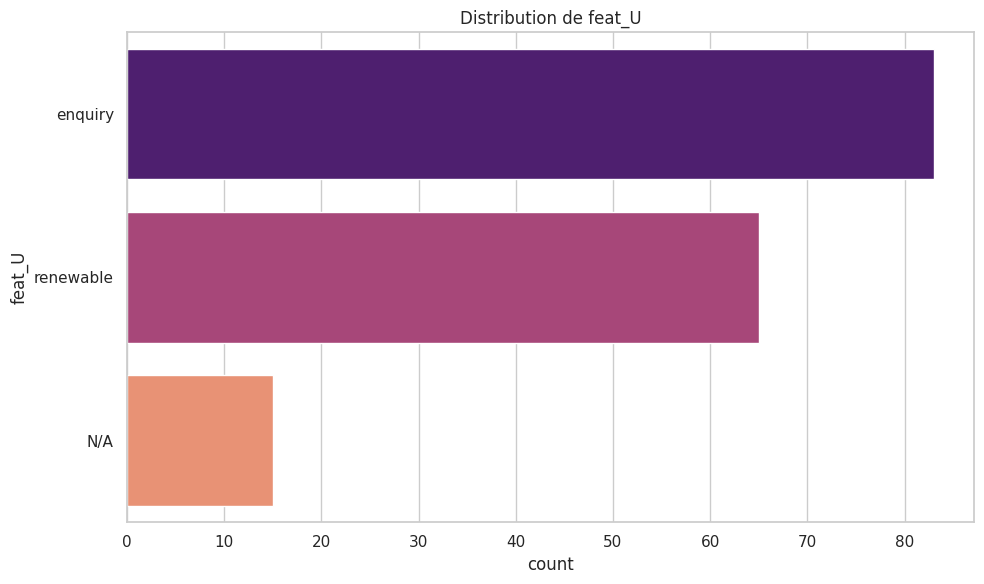


feat_V:
feat_V
N/A          0.441718
proposals    0.319018
decide       0.239264
Name: proportion, dtype: float64


/tmp/ipython-input-33-1833028954.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=var, order=top_cats,palette='magma')


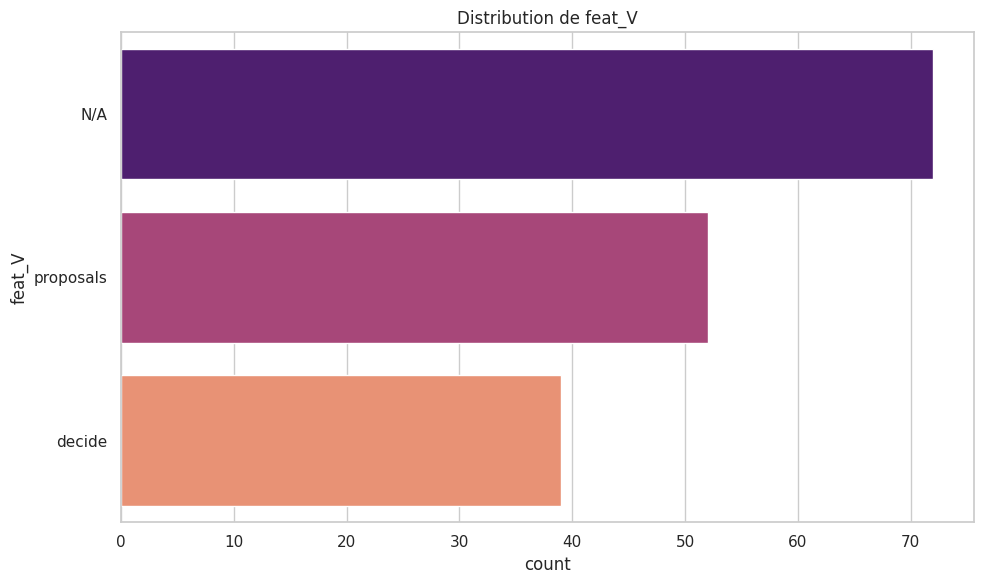


experiment_year:
experiment_year
2019    0.368098
2021    0.251534
2020    0.208589
2017    0.122699
2018    0.049080
Name: proportion, dtype: float64


/tmp/ipython-input-33-1833028954.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=var, order=top_cats,palette='magma')


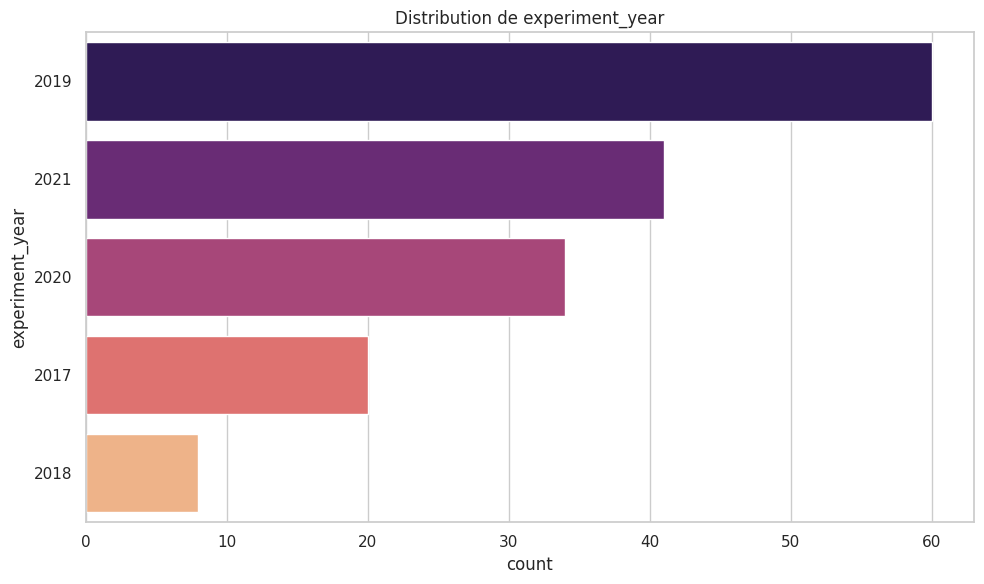


experiment_month:
experiment_month
11    0.171779
8     0.153374
9     0.134969
1     0.098160
6     0.085890
Name: proportion, dtype: float64


/tmp/ipython-input-33-1833028954.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=var, order=top_cats,palette='magma')


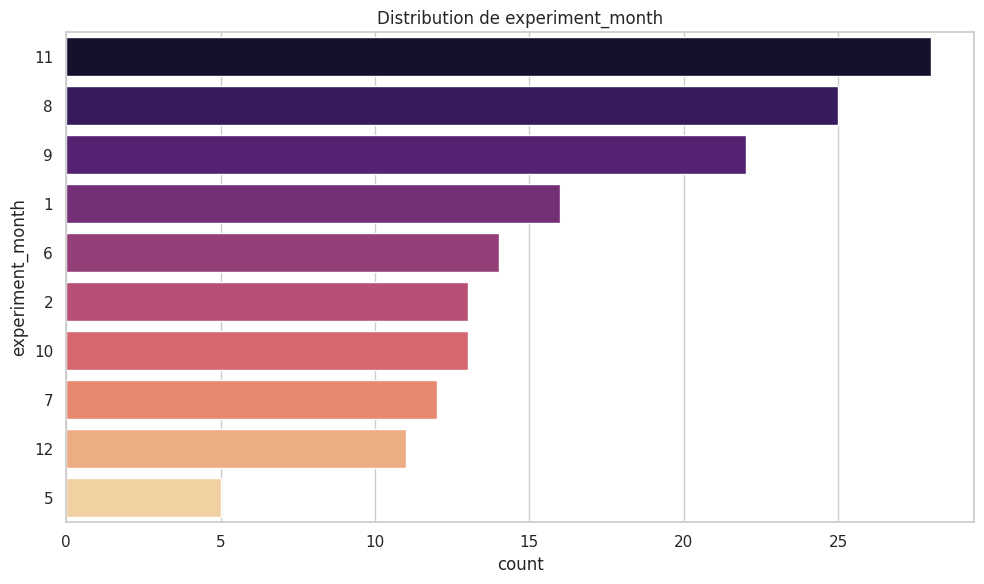

In [33]:
print("\nTop 5 des modalit√©s par variable cat√©gorielle:")
for var in cat_vars:
  print(f"\n{var}:")
  print(df[var].value_counts(normalize=True).head(5))
  # Visualisation des top modalit√©s
  plt.figure(figsize=(10, 6))
  top_cats = df[var].value_counts().head(10).index
  sns.countplot(data=df, y=var, order=top_cats,palette='magma')
  #sns.countplot(data=df, y=var, order=top_cats, hue='hue_var', palette='magma', legend=False)
  plt.title(f'Distribution de {var}')
  plt.tight_layout()
  plt.savefig(f'distribution_{var}.png')
  plt.show()

ANALYSE BIVARI√âE

**Corr√©lations quantitatives :**

Matrice de Spearman (robuste aux non-lin√©arit√©s)

Focus sur les relations avec Y1/Y2

Identification des features les plus corr√©l√©es aux performances

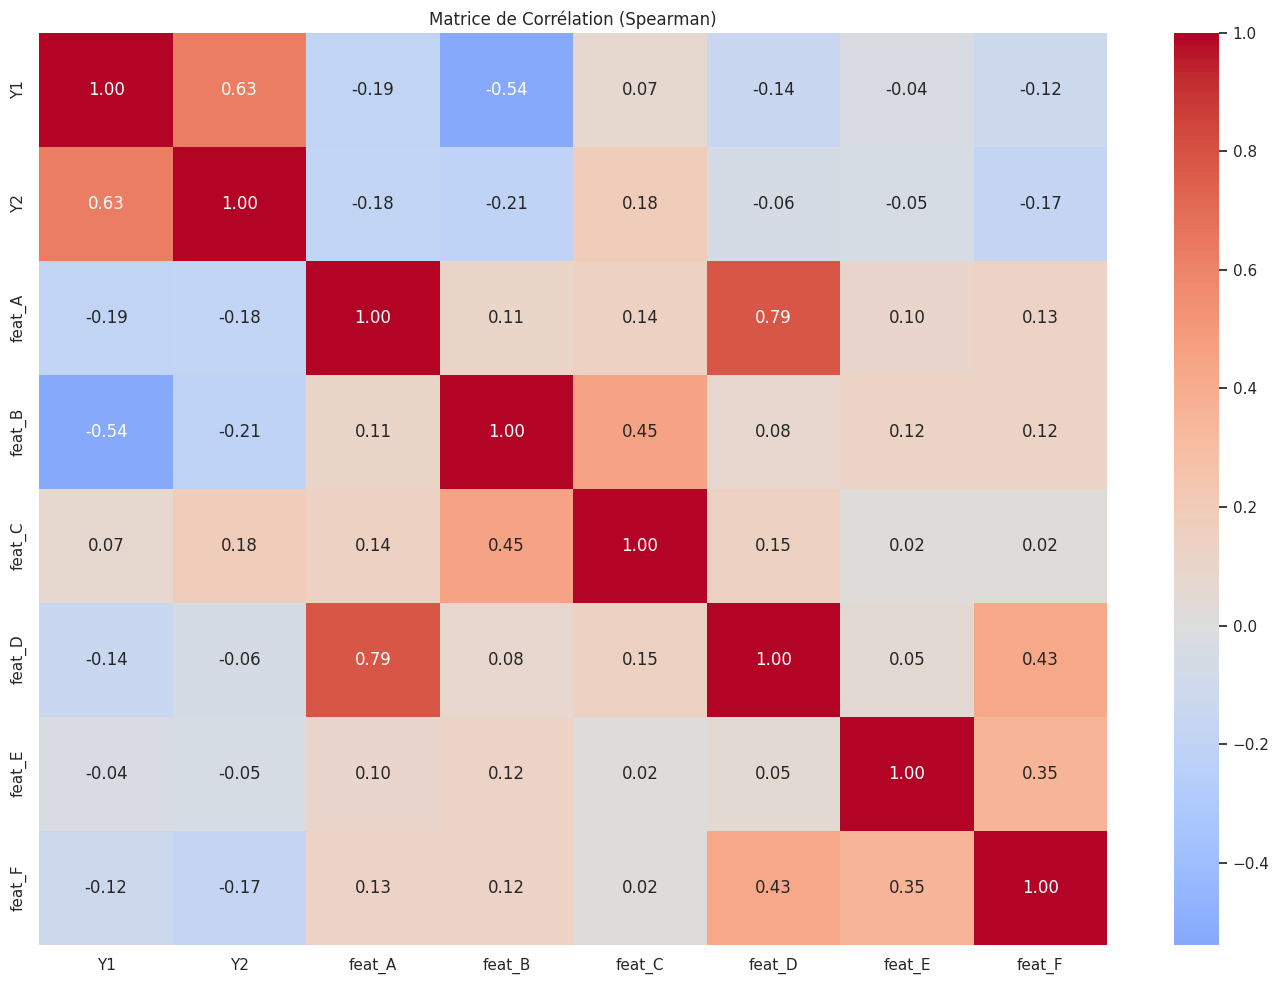

In [34]:
 # Corr√©lations entre variables quantitatives
quant_vars = ['Y1', 'Y2'] + [f'feat_{c}' for c in 'ABCDEF']
corr_matrix = df[quant_vars].corr(method='spearman')

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Matrice de Corr√©lation (Spearman)')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()


Voici la matrice de corr√©lation entre les variables num√©riques (Y1, Y2, feat_A, ..., feat_F) :

Nous observons que :
Y1 et Y2 pr√©sentent une corr√©lation mod√©r√©e √† forte avec certaines features techniques :

Y1 est positivement corr√©l√© √† feat_A, feat_E

Y2 a une corr√©lation plus marqu√©e avec feat_D et aussi avec feat_E

Certaines features comme feat_F semblent peu corr√©l√©es aux performances

In [35]:
print("\nCorr√©lations significatives avec Y1 et Y2:")
y1_corr = corr_matrix['Y1'].sort_values(key=abs, ascending=False)[1:6]
y2_corr = corr_matrix['Y2'].sort_values(key=abs, ascending=False)[1:6]
print(f"Y1: {y1_corr}")
print(f"Y2: {y2_corr}")


Corr√©lations significatives avec Y1 et Y2:
Y1: Y2        0.625797
feat_B   -0.538140
feat_A   -0.185225
feat_D   -0.143055
feat_F   -0.121515
Name: Y1, dtype: float64
Y2: Y1        0.625797
feat_B   -0.205605
feat_A   -0.183115
feat_C    0.180695
feat_F   -0.173348
Name: Y2, dtype: float64


**Relations cat√©gorielles-performances :**

Boxplots de Y1/Y2 par cat√©gorie

Tests ANOVA pour relations significatives

Impact des valeurs "N/A" sur les performances

In [36]:
# Relations entre cat√©gorielles et performances
cat_vars = [c for c in df.columns if c.startswith('feat_') and c not in quant_vars] + ['experiment_year', 'experiment_month']



Impact des cat√©gories sur Y1 et Y2:


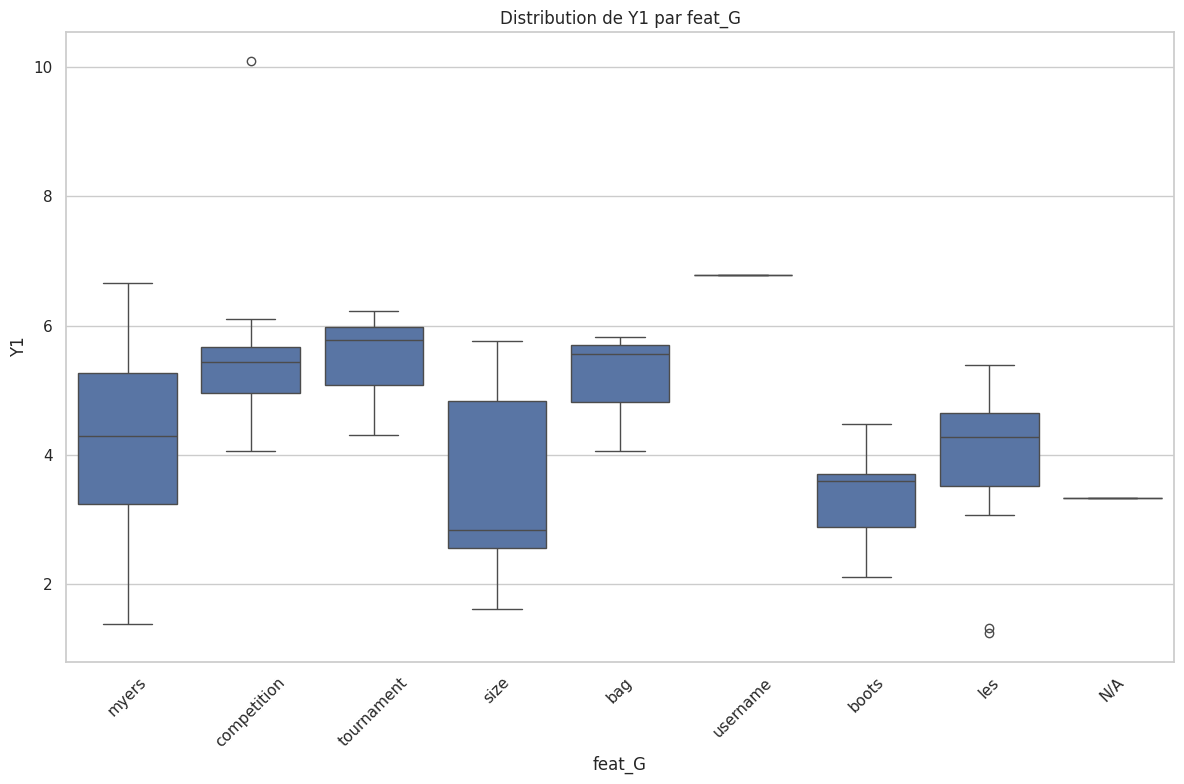

feat_G vs Y1: F-value=6.21, p-value=0.0000


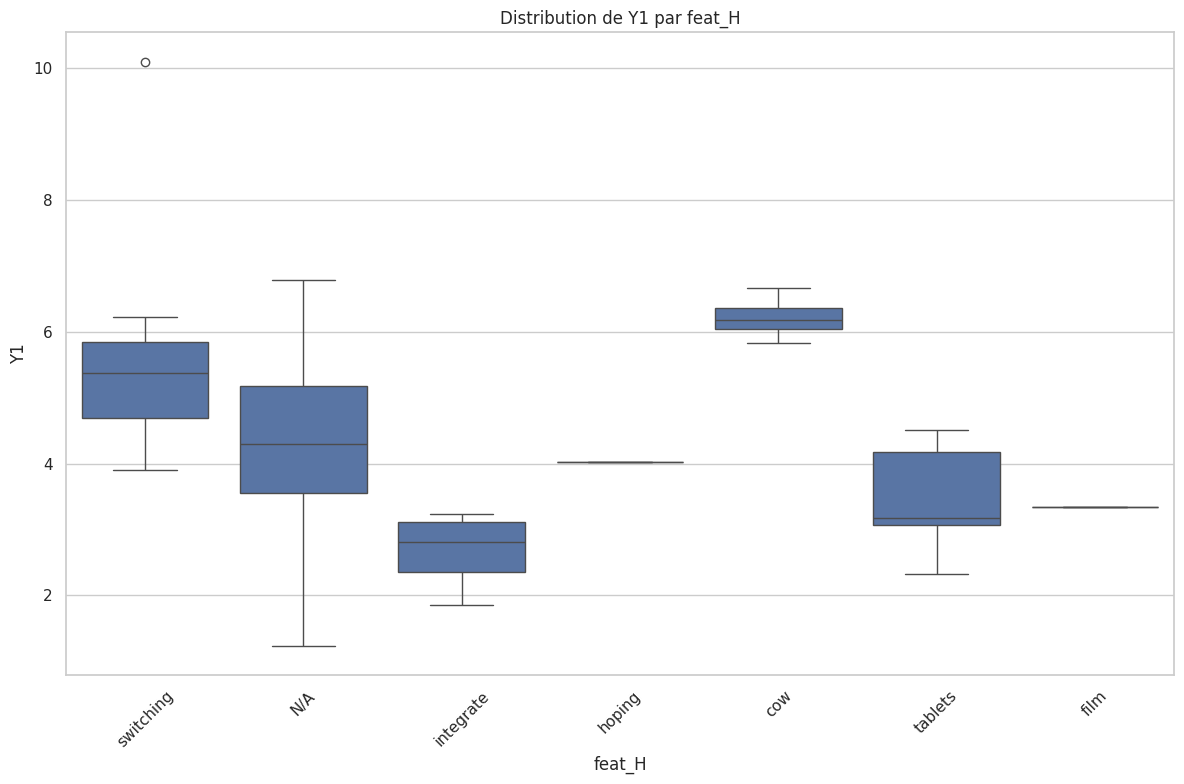

feat_H vs Y1: F-value=18.32, p-value=0.0000


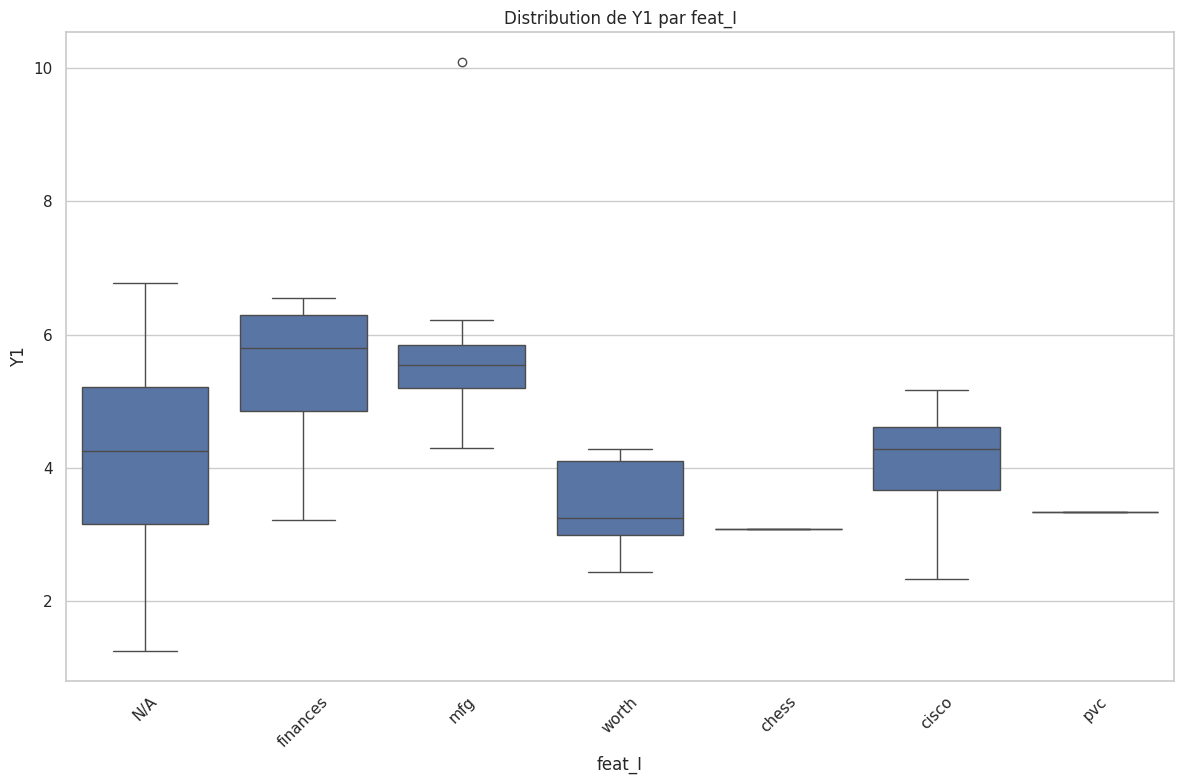

feat_I vs Y1: F-value=6.04, p-value=0.0004


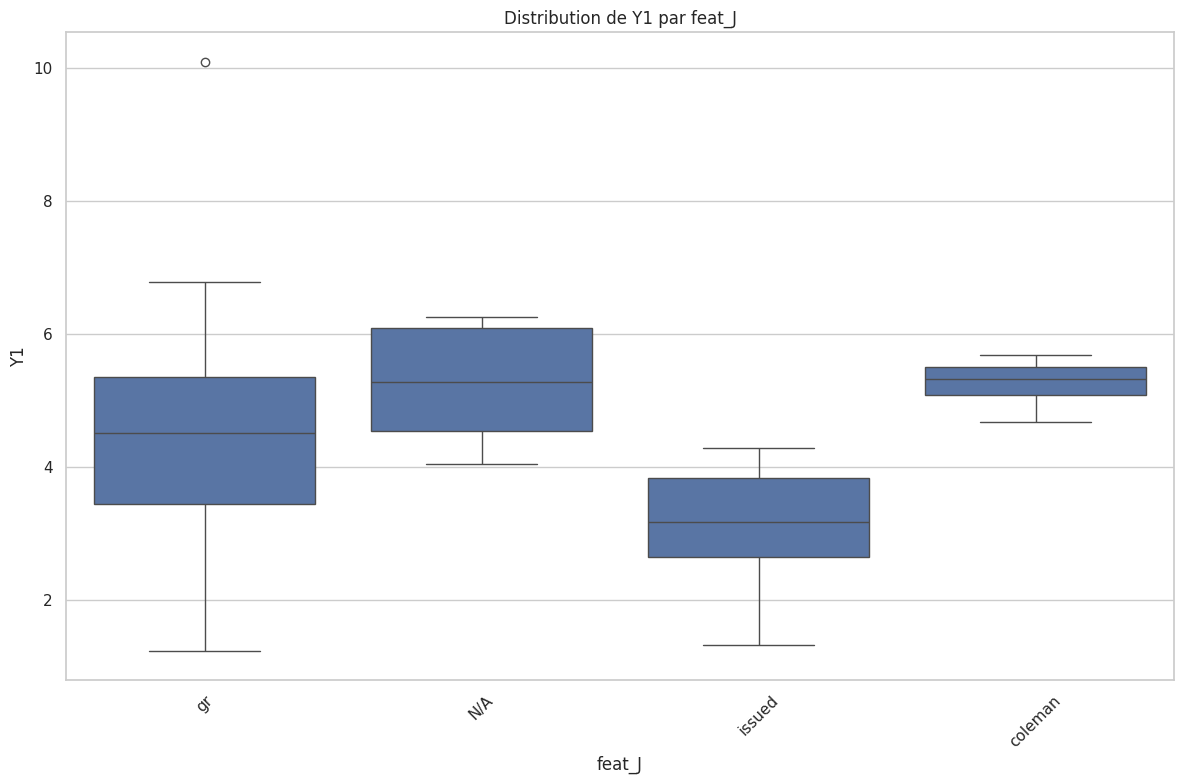

feat_J vs Y1: F-value=9.36, p-value=0.0001


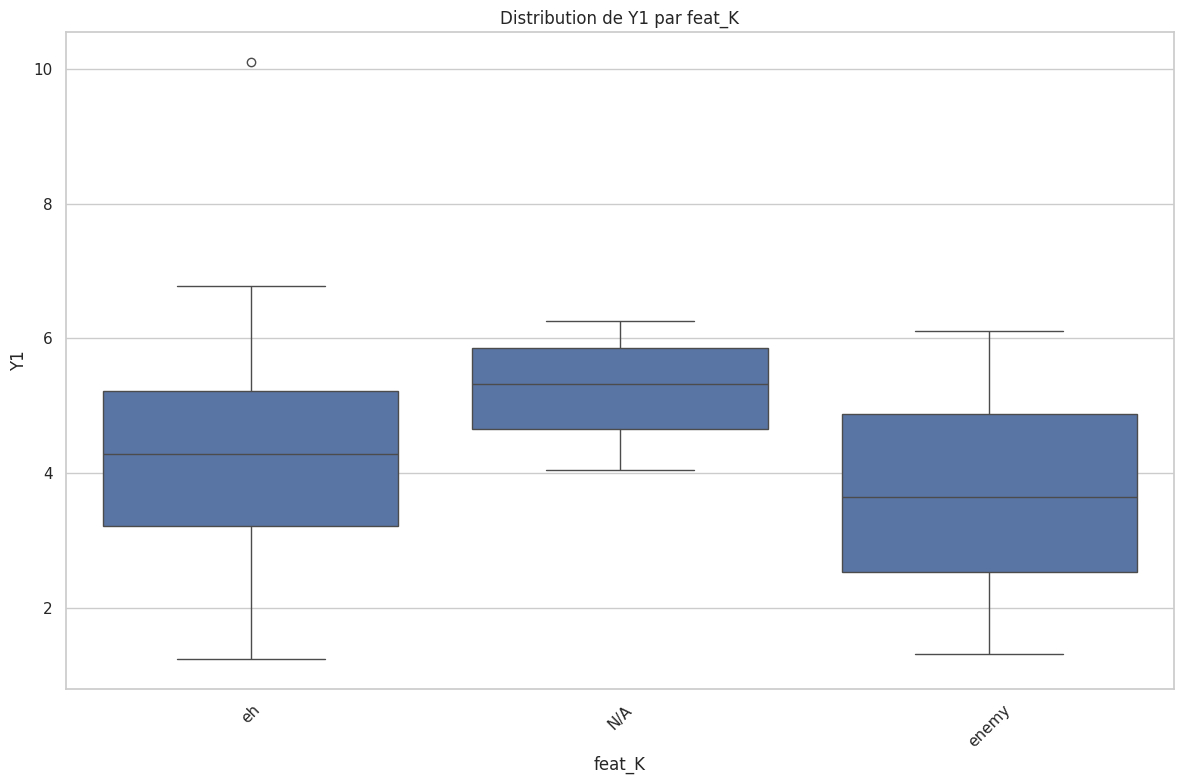

feat_K vs Y1: F-value=2.41, p-value=0.1226


In [37]:
print("\nImpact des cat√©gories sur Y1 et Y2:")
for var in cat_vars[:5]:  # Limit√© √† 5 pour l'exemple
  plt.figure(figsize=(12, 8))
  sns.boxplot(data=df, x=var, y='Y1')
  plt.xticks(rotation=45)
  plt.title(f'Distribution de Y1 par {var}')
  plt.tight_layout()
  plt.savefig(f'y1_by_{var}.png')
  plt.show()

  # Test ANOVA pour les relations significatives
  groups = [df[df[var]==cat]['Y1'] for cat in df[var].unique() if cat != 'N/A']
  if len(groups) > 1:
    f_val, p_val = stats.f_oneway(*groups)
    print(f"{var} vs Y1: F-value={f_val:.2f}, p-value={p_val:.4f}")


**√âvolution temporelle :**
Tendances des performances sur la p√©riode,
Changements dans les distributions temporelles

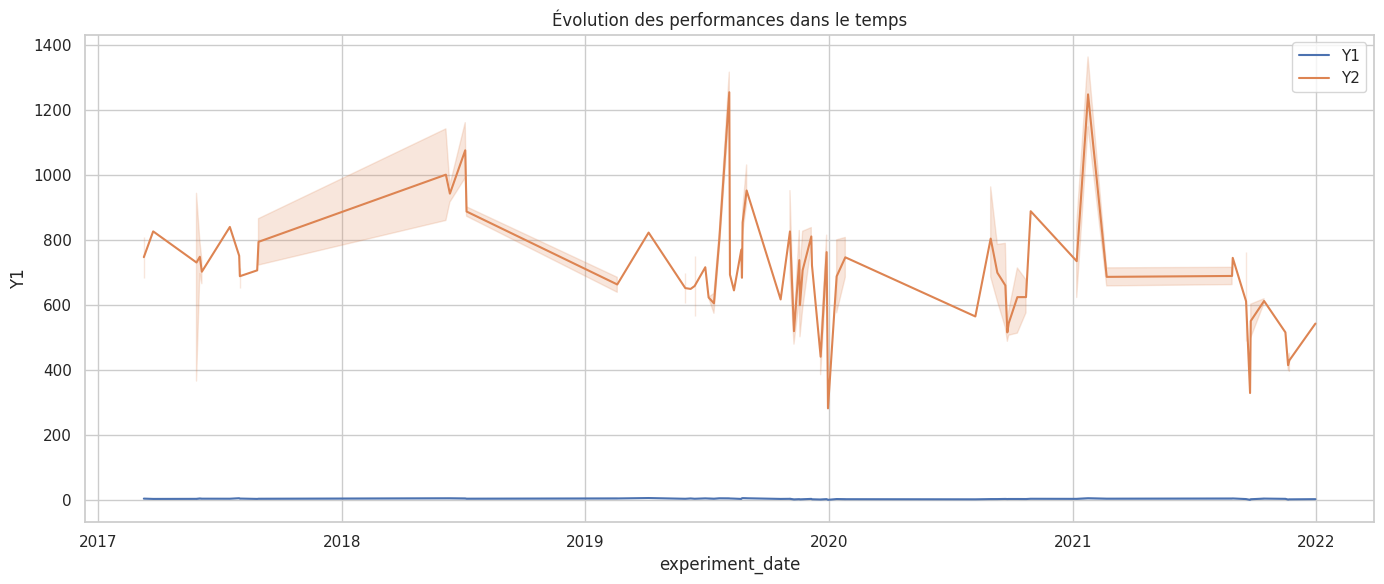

In [38]:
# Analyse temporelle des performances
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='experiment_date', y='Y1', label='Y1')
sns.lineplot(data=df, x='experiment_date', y='Y2', label='Y2')
plt.title('√âvolution des performances dans le temps')
plt.tight_layout()
plt.savefig('performance_trends.png')
plt.show()

**Associations cat√©gorielles :**

Calcul du Cramer's V pour mesurer les liens entre features

Identification des combinaisons de features r√©currentes

In [39]:
# Association entre cat√©gorielles (Cramer's V)
def cramers_v(confusion_matrix):
  chi2 = chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum().sum()
  phi2 = chi2 / n
  r, k = confusion_matrix.shape
  return np.sqrt(phi2 / min((k-1), (r-1)))

print("\nAssociations entre variables cat√©gorielles (Cramer's V):")
for i in range(len(cat_vars)):
  for j in range(i+1, len(cat_vars)):
    confusion_matrix = pd.crosstab(df[cat_vars[i]], df[cat_vars[j]])
    if confusion_matrix.size > 0:
      v = cramers_v(confusion_matrix.values)
      if v > 0.3:  # Seuil d'int√©r√™t
        print(f"{cat_vars[i]} vs {cat_vars[j]}: {v:.2f}")


Associations entre variables cat√©gorielles (Cramer's V):
feat_G vs feat_H: 0.58
feat_G vs feat_I: 0.55
feat_G vs feat_J: 0.40
feat_G vs feat_K: 0.36
feat_G vs feat_L: 0.48
feat_G vs feat_M: 0.50
feat_G vs feat_N: 0.44
feat_G vs feat_O: 0.56
feat_G vs feat_P: 0.49
feat_G vs feat_Q: 0.48
feat_G vs feat_R: 0.50
feat_G vs feat_S: 0.42
feat_G vs feat_T: 0.45
feat_G vs feat_U: 0.53
feat_G vs feat_V: 0.47
feat_G vs feat_A_applicable: 0.49
feat_G vs feat_B_applicable: 0.46
feat_G vs feat_C_applicable: 0.48
feat_G vs feat_D_applicable: 0.83
feat_G vs experiment_year: 0.68
feat_G vs experiment_month: 0.60
feat_H vs feat_I: 0.59
feat_H vs feat_J: 0.35


/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))


feat_H vs feat_K: 0.34
feat_H vs feat_L: 0.34
feat_H vs feat_M: 0.64
feat_H vs feat_N: 0.51
feat_H vs feat_O: 0.85
feat_H vs feat_P: 0.58
feat_H vs feat_Q: 0.63
feat_H vs feat_R: 0.47
feat_H vs feat_T: 0.34
feat_H vs feat_U: 0.57
feat_H vs feat_V: 0.41
feat_H vs feat_A_applicable: 0.43
feat_H vs feat_B_applicable: 0.58
feat_H vs experiment_year: 0.42
feat_H vs experiment_month: 0.40
feat_I vs feat_J: 0.36
feat_I vs feat_M: 0.50
feat_I vs feat_N: 0.69
feat_I vs feat_O: 0.57
feat_I vs feat_P: 0.82
feat_I vs feat_Q: 0.33
feat_I vs feat_R: 0.58
feat_I vs feat_S: 0.39
feat_I vs feat_T: 0.37
feat_I vs feat_U: 0.32
feat_I vs feat_V: 0.58
feat_I vs feat_B_applicable: 0.31
feat_I vs feat_D_applicable: 0.39
feat_I vs experiment_year: 0.39
feat_I vs experiment_month: 0.36
feat_J vs feat_K: 0.77
feat_J vs feat_L: 0.75
feat_J vs feat_M: 0.48
feat_J vs feat_N: 0.43
feat_J vs feat_O: 0.35
feat_J vs feat_P: 0.40
feat_J vs feat_Q: 0.35
feat_J vs feat_R: 0.37
feat_J vs feat_S: 0.41
feat_J vs feat_T: 0.7

/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))


feat_K vs feat_M: 0.45
feat_K vs feat_N: 0.31
feat_K vs feat_O: 0.34
feat_K vs feat_T: 0.51
feat_K vs feat_A_applicable: 1.00
feat_K vs experiment_month: 0.32
feat_L vs feat_M: 0.51
feat_L vs feat_N: 0.41
feat_L vs feat_O: 0.35
feat_L vs feat_Q: 0.40
feat_L vs feat_R: 0.38
feat_L vs feat_T: 0.52
feat_L vs feat_A_applicable: 1.00
feat_L vs feat_B_applicable: 0.38
feat_L vs feat_C_applicable: 0.43
feat_L vs feat_D_applicable: 0.32


/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))


feat_L vs experiment_month: 0.41
feat_M vs feat_N: 0.60
feat_M vs feat_O: 0.81
feat_M vs feat_P: 0.63
feat_M vs feat_Q: 0.71
feat_M vs feat_R: 0.63
feat_M vs feat_S: 0.59
feat_M vs feat_T: 0.42
feat_M vs feat_U: 1.00
feat_M vs feat_V: 0.64
feat_M vs feat_A_applicable: 0.55
feat_M vs feat_B_applicable: 0.89
feat_M vs feat_C_applicable: 0.52
feat_M vs feat_D_applicable: 0.45
feat_M vs experiment_year: 0.65
feat_M vs experiment_month: 0.48
feat_N vs feat_O: 0.66
feat_N vs feat_P: 0.78
feat_N vs feat_Q: 0.45
feat_N vs feat_R: 0.90
feat_N vs feat_S: 0.36
feat_N vs feat_T: 0.37
feat_N vs feat_U: 0.46
feat_N vs feat_V: 0.97
feat_N vs feat_A_applicable: 0.32


/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))


feat_N vs feat_B_applicable: 0.43
feat_N vs feat_C_applicable: 0.91
feat_N vs feat_D_applicable: 0.47
feat_N vs experiment_year: 0.52
feat_N vs experiment_month: 0.39
feat_O vs feat_P: 0.60
feat_O vs feat_Q: 0.61
feat_O vs feat_R: 0.51
feat_O vs feat_T: 0.34
feat_O vs feat_U: 0.49
feat_O vs feat_V: 0.36
feat_O vs feat_A_applicable: 0.46
feat_O vs feat_B_applicable: 0.49
feat_O vs experiment_year: 0.44
feat_O vs experiment_month: 0.46
feat_P vs feat_Q: 0.42
feat_P vs feat_R: 0.56
feat_P vs feat_S: 0.38
feat_P vs feat_T: 0.42
feat_P vs feat_V: 0.45
feat_P vs feat_A_applicable: 0.37
feat_P vs feat_D_applicable: 0.36


/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))


feat_P vs experiment_year: 0.37
feat_P vs experiment_month: 0.42
feat_Q vs feat_R: 0.50
feat_Q vs feat_S: 0.32
feat_Q vs feat_U: 0.90
feat_Q vs feat_V: 0.44
feat_Q vs feat_A_applicable: 0.37
feat_Q vs feat_B_applicable: 0.95
feat_Q vs feat_C_applicable: 0.42
feat_Q vs experiment_year: 0.50
feat_Q vs experiment_month: 0.48
feat_R vs feat_T: 0.32
feat_R vs feat_U: 0.33
feat_R vs feat_V: 0.98
feat_R vs feat_C_applicable: 0.99
feat_R vs feat_D_applicable: 0.34
feat_R vs experiment_year: 0.40
feat_R vs experiment_month: 0.46
feat_S vs feat_T: 0.73
feat_S vs feat_A_applicable: 0.36


/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-

feat_S vs feat_D_applicable: 0.35
feat_S vs experiment_month: 0.37
feat_T vs feat_A_applicable: 0.72
feat_T vs feat_D_applicable: 0.36
feat_T vs experiment_month: 0.42
feat_U vs feat_V: 0.31
feat_U vs feat_B_applicable: 0.86
feat_U vs experiment_year: 0.35
feat_U vs experiment_month: 0.48
feat_V vs feat_C_applicable: 0.95
feat_V vs experiment_year: 0.32
feat_V vs experiment_month: 0.47
feat_A_applicable vs experiment_month: 0.36
feat_B_applicable vs experiment_year: 0.35
feat_B_applicable vs experiment_month: 0.53
feat_C_applicable vs experiment_year: 0.41
feat_C_applicable vs experiment_month: 0.43
feat_D_applicable vs experiment_month: 0.65
experiment_year vs experiment_month: 0.59


/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-input-39-2760668339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min((k-1), (r-1)))
/tmp/ipython-

les relations entre les caract√©ristiques de conception et les performances Œ≥1, Œ≥2

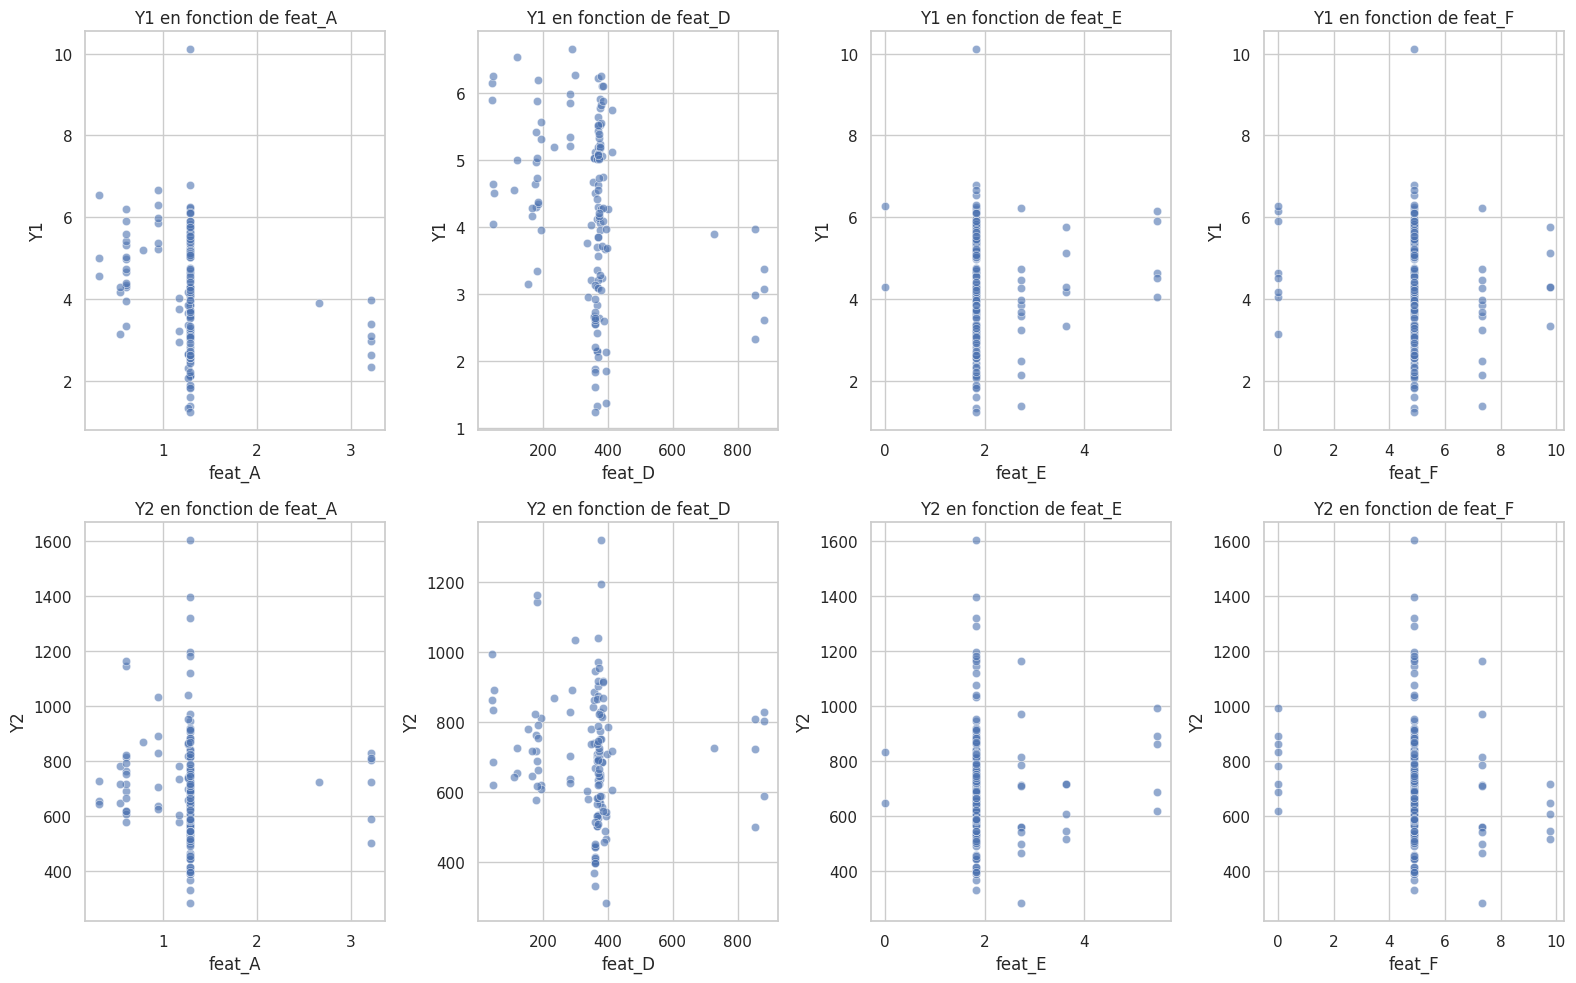

In [40]:
# Liste des caract√©ristiques num√©riques √† √©tudier
features_quant = ['feat_A', 'feat_D', 'feat_E', 'feat_F']
performances = ['Y1', 'Y2']

sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

plot_num = 1
for perf in performances:
    for feat in features_quant:
        plt.subplot(2, len(features_quant), plot_num)
        sns.scatterplot(data=df, x=feat, y=perf, alpha=0.6)
        plt.title(f'{perf} en fonction de {feat}')
        plt.xlabel(feat)
        plt.ylabel(perf)
        plot_num += 1

plt.tight_layout()
plt.show()


les scatterplots illustrant les relations entre certaines caract√©ristiques techniques (feat_A, feat_D, feat_E, feat_F) et les performances Œ≥1 (Y1) et Œ≥2 (Y2).
L'analyse montre que :
feat_A et feat_E montrent des tendances positives avec Y1 (plus la valeur augmente, meilleure est la performance dans certains cas).

feat_D semble avoir une influence plus forte sur Y2, mais la relation est dispers√©e (possibles non-lin√©arit√©s).

feat_F n‚Äôindique pas de lien clair avec les performances, ce qui sugg√®re un effet n√©gligeable ou plus complexe.

# 2. Pr√©paration des donn√©es pour la classification automatique

In [41]:
!pip install gower

In [42]:
!pip install kmedoids

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 528.2/528.2 kB 19.6 MB/s eta 0:00:00


In [ ]:
!pip install gower

In [43]:
!pip install scikit-learn-extra

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.1/2.1 MB 27.1 MB/s eta 0:00:00


In [44]:
import gower
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.metrics import silhouette_score



**Choix de la distance de Gower (ou "similarit√© de Gower")**

Pourquoi ?

Gower permet de mesurer la distance entre observations contenant √† la fois des variables num√©riques et cat√©gorielles.

Elle normalise automatiquement chaque variable pour √©viter qu‚Äôune variable num√©rique domine les autres.

Elle g√®re les valeurs manquantes nativement (tu peux les exclure ou pond√©rer).

Elle respecte la s√©mantique des types : distance de Manhattan pour les num√©riques, dissimilarit√© simple pour les cat√©gorielles.

In [45]:
# 1. Chargement et pr√©paration des donn√©es (version corrig√©e)
def load_and_clean_data(file_path):
    df = pd.read_csv(file_path)

    # Conversion des types
    df['experiment_date'] = pd.to_datetime(df['experiment_date'])

    # D√©finition des types de colonnes
    numeric_features = ['feat_A', 'feat_B', 'feat_C', 'feat_D', 'feat_E', 'feat_F']
    categorical_features = [f'feat_{c}' for c in 'GHIJKLMNOPQRSTUV']

    # Traitement des num√©riques
    for col in numeric_features:
        # Gestion des NULL
        df[col] = df[col].replace('NULL', np.nan)

        # Cr√©ation applicabilit√© AVANT remplacement
        df[f'{col}_applicable'] = df[col].notnull().astype(int)

        # Remplacement des NaN par 0
        df[col] = df[col].fillna(0).astype(float)

    # Traitement des cat√©gorielles
    for col in categorical_features:
        df[col] = df[col].replace('NULL', 'N/A').fillna('N/A')

    # Extraction des features temporelles - CORRECTION ICI
    if 'experiment_date' in df.columns:
        df['year'] = df['experiment_date'].dt.year
        df['month'] = df['experiment_date'].dt.month
    else:
        # Fallback si la colonne date est manquante
        print("Avertissement: Colonne 'experiment_date' manquante")
        df['year'] = 2017  # Valeur par d√©faut
        df['month'] = 1

    # Suppression des constantes - SAUF LES APPLICABILIT√âS ET VARIABLES TEMPORELLES
    constant_cols = [col for col in df.columns
                     if df[col].nunique() == 1
                     and col != 'year'
                     and col != 'month'
                     and not col.endswith('_applicable')]

    return df.drop(columns=constant_cols, errors='ignore')


In [46]:

# 2. Pr√©paration des donn√©es pour Gower (version √©largie)
def prepare_gower_data(df):
    # Copie des donn√©es
    gdf = df.copy()

    # S√©lection des caract√©ristiques pertinentes (TOUTES incluses)
    features = [
        # Performances
        'Y1', 'Y2',

        # Caract√©ristiques quantitatives (TOUTES)
        'feat_A', 'feat_B', 'feat_C', 'feat_D', 'feat_E', 'feat_F',

        # Indicateurs d'applicabilit√© (TOUS)
        'feat_A_applicable', 'feat_B_applicable', 'feat_C_applicable',
        'feat_D_applicable', 'feat_E_applicable', 'feat_F_applicable',

        # Caract√©ristiques cat√©gorielles importantes
        'feat_G', 'feat_M', 'feat_U', 'year'
    ]

    # V√©rification des colonnes manquantes
    missing_cols = [col for col in features if col not in gdf.columns]
    if missing_cols:
        print(f"Avertissement: Colonnes manquantes {missing_cols}")
        features = [col for col in features if col in gdf.columns]

    gdf = gdf[features]

    # Encodage des cat√©gorielles avec LabelEncoder
    cat_cols = ['feat_G', 'feat_M', 'feat_U', 'year']
    for col in cat_cols:
        if col in gdf.columns:
            le = LabelEncoder()
            gdf[col] = le.fit_transform(gdf[col].astype(str))

    # Sp√©cification des types de variables
    numerical_cols = ['Y1', 'Y2', 'feat_A', 'feat_B', 'feat_C', 'feat_D', 'feat_E', 'feat_F']
    categorical_cols = [col for col in cat_cols if col in gdf.columns]
    binary_cols = [c for c in gdf.columns if '_applicable' in c]

    return gdf, numerical_cols, categorical_cols, binary_cols


In [47]:
# 3. Calcul de la matrice de distance de Gower (inchang√©)
def compute_gower_matrix(gdf, num_cols, cat_cols, bin_cols):
    X = gdf.values
    feature_types = []
    for col in gdf.columns:
        if col in num_cols:
            feature_types.append(0)
        elif col in cat_cols:
            feature_types.append(1)
        else:  # binary_cols
            feature_types.append(2)

    return gower.gower_matrix(X, feature_types=feature_types)

In [48]:
# 4. Clustering avec K-Medoids (inchang√©)
def gower_clustering(gower_matrix, n_clusters=4):
    kmedoids = KMedoids(
        n_clusters=n_clusters,
        metric='precomputed',
        method='pam',
        init='k-medoids++',
        random_state=42
    )
    clusters = kmedoids.fit_predict(gower_matrix)
    return clusters, kmedoids.medoid_indices_

In [49]:
# 5. Pipeline complet avec gestion d'erreurs
def full_gower_clustering(file_path):
    try:
        # Chargement avec gestion d'erreurs renforc√©e
        df = load_and_clean_data(file_path)
        print("Colonnes disponibles apr√®s nettoyage:", df.columns.tolist())

        # Pr√©paration des donn√©es
        gdf, num_cols, cat_cols, bin_cols = prepare_gower_data(df)
        print("\nColonnes utilis√©es pour Gower:", gdf.columns.tolist())

        # Calcul de la matrice de Gower
        print("\nCalcul de la matrice de distance de Gower...")
        gower_matrix = compute_gower_matrix(gdf, num_cols, cat_cols, bin_cols)

        # D√©termination du nombre optimal de clusters
        silhouette_scores = []
        cluster_range = range(2, 8)

        for k in cluster_range:
            clusters, _ = gower_clustering(gower_matrix, n_clusters=k)
            sil_score = silhouette_score(gower_matrix, clusters, metric='precomputed')
            silhouette_scores.append(sil_score)
            print(f"k={k} | Silhouette: {sil_score:.3f}")

        # S√©lection du meilleur k
        best_k = cluster_range[np.argmax(silhouette_scores)]
        print(f"\nMeilleur nombre de clusters: {best_k}")

        # Clustering final
        final_clusters, medoids = gower_clustering(gower_matrix, n_clusters=best_k)

        # Ajout des clusters au DataFrame original
        df['cluster'] = final_clusters

        return df, gower_matrix, medoids

    except Exception as e:
        print(f"Erreur lors du clustering: {str(e)}")
        import traceback
        traceback.print_exc()
        return None, None, None


In [50]:

# 6. Ex√©cution et visualisation
def main(file_path):
    df, gower_matrix, medoids = full_gower_clustering(file_path)

    if df is not None:
        # Visualisation MDS
        try:
            mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
            pos = mds.fit_transform(gower_matrix)
            plt.figure(figsize=(10, 8))
            plt.scatter(pos[:, 0], pos[:, 1], c=df['cluster'], cmap='viridis', alpha=0.8)
            plt.title('Visualisation 2D des Clusters (MDS)')
            plt.colorbar(label='Cluster')
            plt.savefig('gower_clusters.png')
            plt.show()
        except Exception as e:
            print(f"Erreur de visualisation: {str(e)}")

        # Analyse des clusters
        print("\nTaille des clusters:")
        print(df['cluster'].value_counts().sort_index())

        print("\nCaract√©ristiques moyennes par cluster:")
        cluster_stats = df.groupby('cluster').mean(numeric_only=True)
        print(cluster_stats)

        return df

In [51]:
def compute_gower_matrix(X):
    missing_cols = [col for col in gower_cols if col not in X.columns]
    if missing_cols:
        print("‚ö†Ô∏è Colonnes manquantes dans X :", missing_cols)
    return gower.gower_matrix(X)


In [52]:
# Ex√©cution principale
if __name__ == "__main__":
    df_clustered = main('/content/gdrive/MyDrive/gdrive/dataset_anon.csv')

    if df_clustered is not None:
        print("\nClustering termin√© avec succ√®s!")
        print("DataFrame avec clusters:")
        print(df_clustered[['Y1', 'Y2', 'feat_G', 'feat_M', 'cluster']].head())

Colonnes disponibles apr√®s nettoyage: ['Y1', 'Y2', 'experiment_date', 'feat_A', 'feat_B', 'feat_C', 'feat_D', 'feat_E', 'feat_F', 'feat_G', 'feat_H', 'feat_I', 'feat_J', 'feat_K', 'feat_L', 'feat_M', 'feat_N', 'feat_O', 'feat_P', 'feat_Q', 'feat_R', 'feat_S', 'feat_T', 'feat_U', 'feat_V', 'feat_A_applicable', 'feat_B_applicable', 'feat_C_applicable', 'feat_D_applicable', 'feat_E_applicable', 'feat_F_applicable', 'year', 'month']

Colonnes utilis√©es pour Gower: ['Y1', 'Y2', 'feat_A', 'feat_B', 'feat_C', 'feat_D', 'feat_E', 'feat_F', 'feat_A_applicable', 'feat_B_applicable', 'feat_C_applicable', 'feat_D_applicable', 'feat_E_applicable', 'feat_F_applicable', 'feat_G', 'feat_M', 'feat_U', 'year']

Calcul de la matrice de distance de Gower...
Erreur lors du clustering: compute_gower_matrix() takes 1 positional argument but 4 were given


Traceback (most recent call last):
  File "/tmp/ipython-input-49-20779881.py", line 14, in full_gower_clustering
    gower_matrix = compute_gower_matrix(gdf, num_cols, cat_cols, bin_cols)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: compute_gower_matrix() takes 1 positional argument but 4 were given


**3. R√©alisation d‚Äôune classification ascendante hi√©rarchique (CAH)**


In [53]:
# ----------------------------------------------------------
# 1. NETTOYAGE DES DONN√âES
# Remplace les NaN :
# - Par "absent" pour les colonnes cat√©gorielles
# - Par 0 pour les colonnes num√©riques
# ----------------------------------------------------------
df_clean = df.copy()

for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        df_clean[col] = df_clean[col].fillna("absent")
    else:
        df_clean[col] = df_clean[col].fillna(0)


In [54]:
# ----------------------------------------------------------
# 2. CALCUL DE LA MATRICE DE DISTANCE DE GOWER
# ----------------------------------------------------------
distance_matrix = gower.gower_matrix(df_clean)


In [55]:
# ----------------------------------------------------------
# 3. M√âTHODES D‚ÄôAGR√âGATION √Ä TESTER
# average : moyenne des distances
# complete : distance maximale
# single   : distance minimale
# ----------------------------------------------------------
methodes = ['average', 'complete', 'single']
Z_dict = {}  # Stocke les arbres de liaison



### üî∑ M√©thode : AVERAGE ###


/tmp/ipython-input-61-4253589616.py:20: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method=methode)


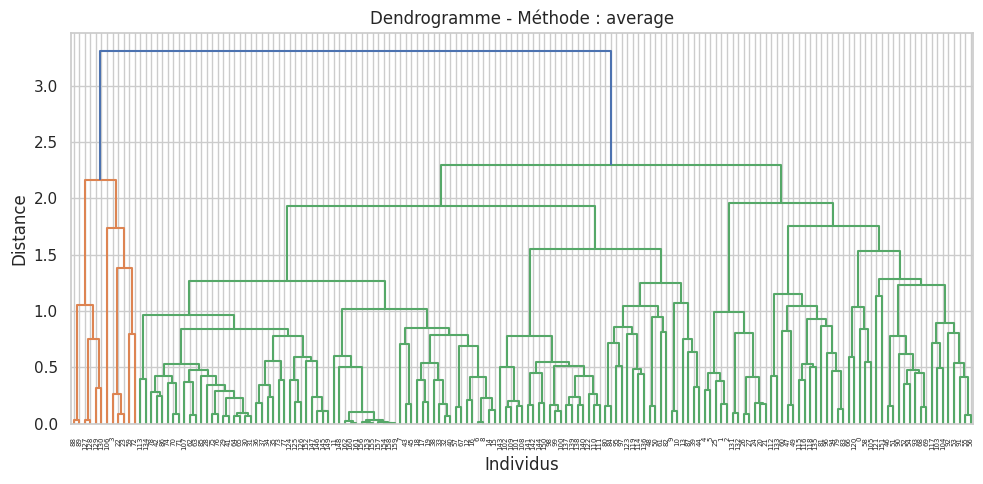

üìä Moyennes par cluster :
                       Y1           Y2
cluster_average                       
1                6.097467  1246.933333
2                5.254317   812.816667
3                4.454499   679.264673
4                3.575957   719.440952

üë• Effectif par cluster :
cluster_average
1      6
2      6
3    102
4     49
Name: count, dtype: int64


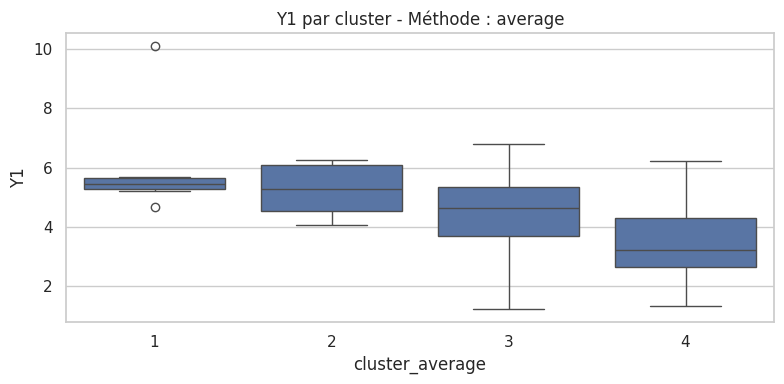

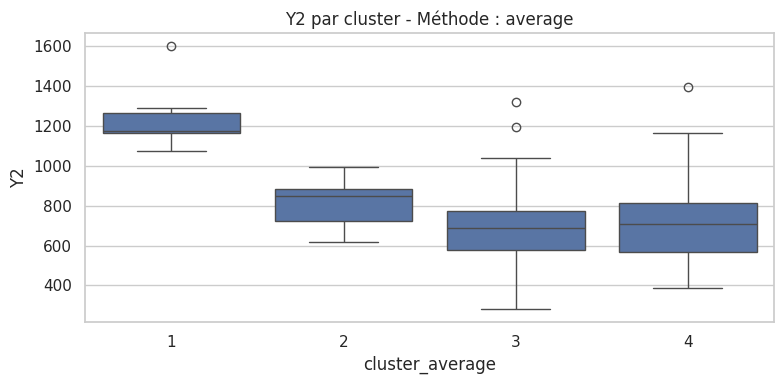


### üî∑ M√©thode : COMPLETE ###


/tmp/ipython-input-61-4253589616.py:20: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method=methode)


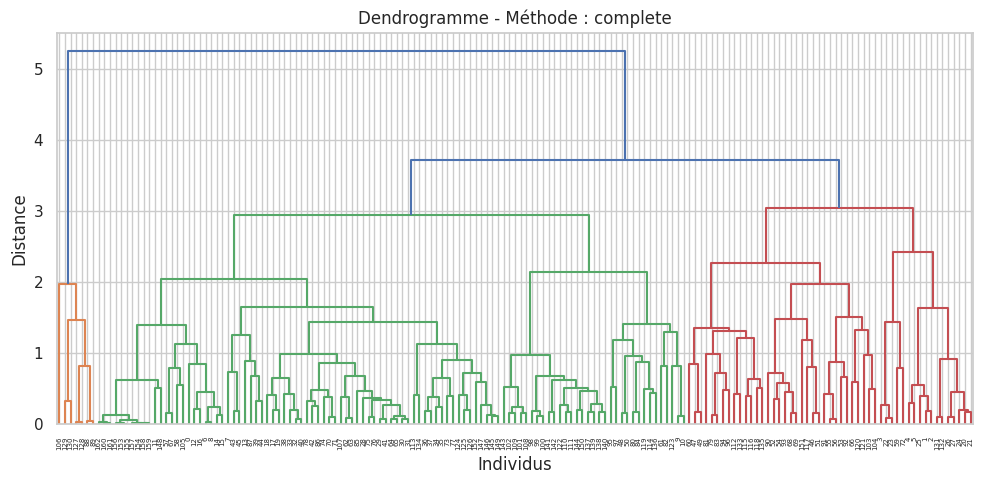

üìä Moyennes par cluster :
                        Y1           Y2
cluster_complete                       
1                 5.870800  1195.866667
2                 4.428268   678.914889
3                 3.011976   633.603627
4                 5.248271   923.320588

üë• Effectif par cluster :
cluster_complete
1      7
2    105
3     34
4     17
Name: count, dtype: int64


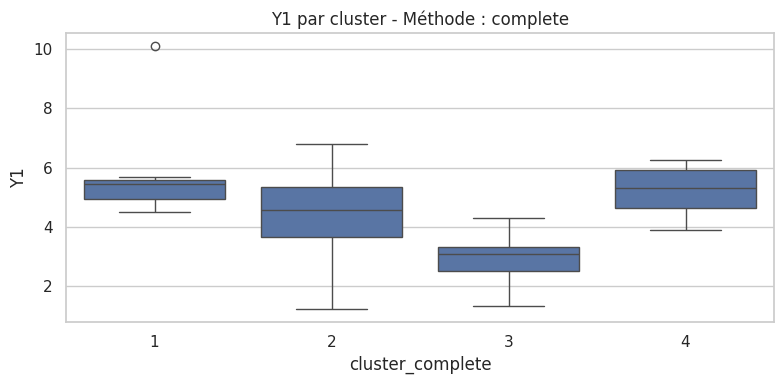

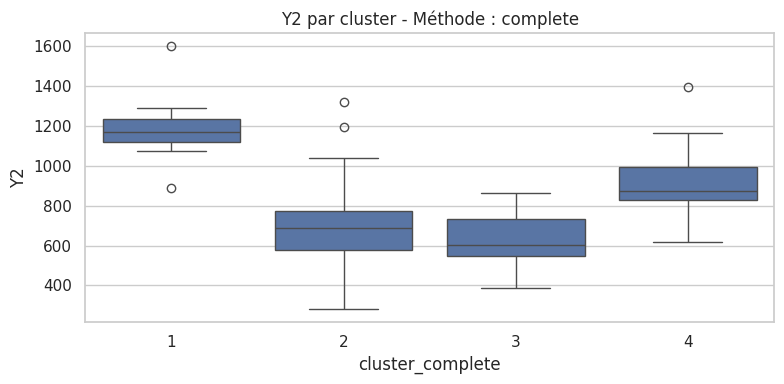


### üî∑ M√©thode : SINGLE ###


/tmp/ipython-input-61-4253589616.py:20: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method=methode)


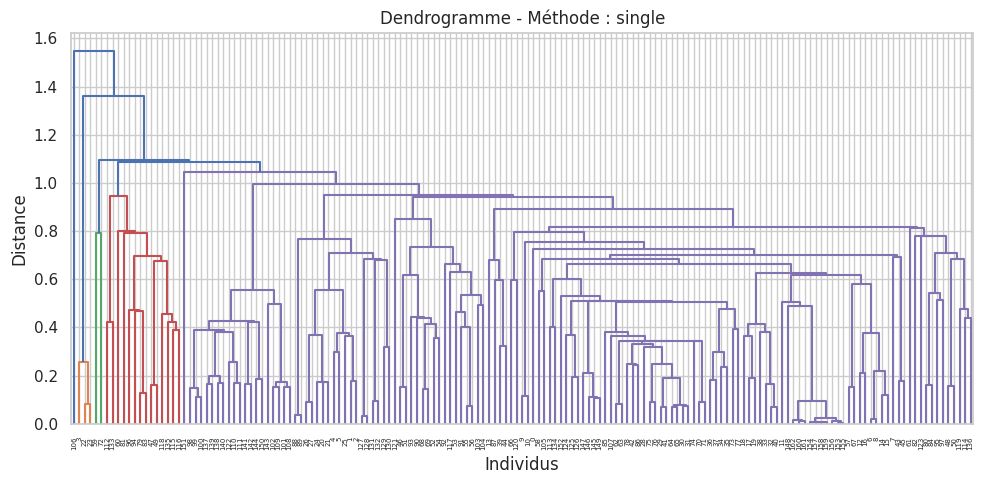

üìä Moyennes par cluster :
                      Y1          Y2
cluster_single                      
1               5.567567  845.833333
2               5.156200  724.966667
3               4.243093  713.498110
4               4.510800  889.466667

üë• Effectif par cluster :
cluster_single
1      3
2      2
3    157
4      1
Name: count, dtype: int64


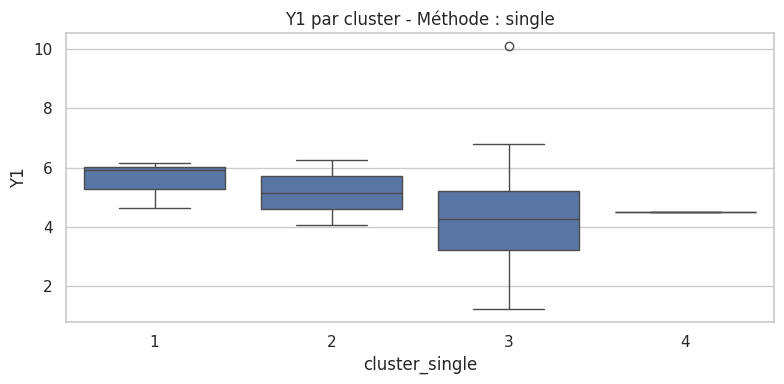

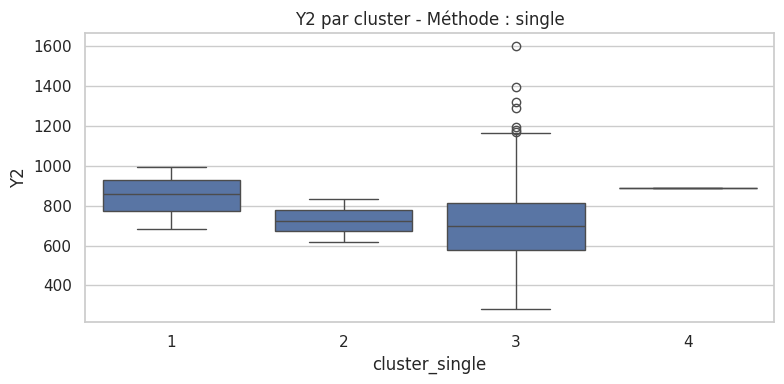

In [61]:
# ----------------------------------------------------------
# 4. BOUCLE SUR CHAQUE M√âTHODE D‚ÄôAGR√âGATION
# - G√©n√®re le dendrogramme
# - D√©coupe en 4 clusters
# - Affiche les moyennes et effectifs
# - Affiche les boxplots
# ----------------------------------------------------------
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


for methode in methodes:
    print(f"\n### üî∑ M√©thode : {methode.upper()} ###")

    # Cr√©ation de l‚Äôarbre hi√©rarchique
    Z = linkage(distance_matrix, method=methode)
    Z_dict[methode] = Z  # M√©morise la structure

    # --- Dendrogramme ---
    plt.figure(figsize=(10, 5))
    dendrogram(Z, labels=df_clean.index, leaf_rotation=90)
    plt.title(f"Dendrogramme - M√©thode : {methode}")
    plt.xlabel("Individus")
    plt.ylabel("Distance")
    plt.tight_layout()
    plt.show()

    # --- D√©coupage en 4 clusters ---
    k = 4
    clusters = fcluster(Z, t=k, criterion='maxclust')
    df_clean[f'cluster_{methode}'] = clusters

    # --- Moyennes de Y1 et Y2 par cluster ---
    print("üìä Moyennes par cluster :")
    print(df_clean.groupby(f'cluster_{methode}')[['Y1', 'Y2']].mean())

    # --- Effectif des clusters ---
    print("\nüë• Effectif par cluster :")
    print(df_clean[f'cluster_{methode}'].value_counts().sort_index())

    # --- Boxplots pour Y1 et Y2 ---
    for y_var in ['Y1', 'Y2']:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df_clean, x=f'cluster_{methode}', y=y_var)
        plt.title(f"{y_var} par cluster - M√©thode : {methode}")
        plt.tight_layout()
        plt.show()



In [62]:
# --- 5. Graphiques de profil pour chaque m√©thode ---
for methode in methodes + ['ward']:
  cluster_col = f'cluster_{methode}'

if cluster_col  in df_clean.columns:
    profile = df_clean.groupby(cluster_col)[['Y1','Y2']].mean()
    plt.figure(figsize=(8, 4))
    profile.T.plot(kind='bar', ax=plt.gca())
    plt.title(f"Profil des clusters - M√©thode : {methode}")
    plt.ylabel("Valeur moyenne")
    plt.xlabel("Variables")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

**`4. (Optionnel) R√©alisation d‚Äôune analyse en composantes (ACP ou ACM)`**





4.1.Cas 1 : ACP (Analyse en Composantes Principales):
S‚Äôapplique si toutes les variables sont num√©riques ou ont √©t√© transform√©es

Text(0, 0.5, 'PC2')

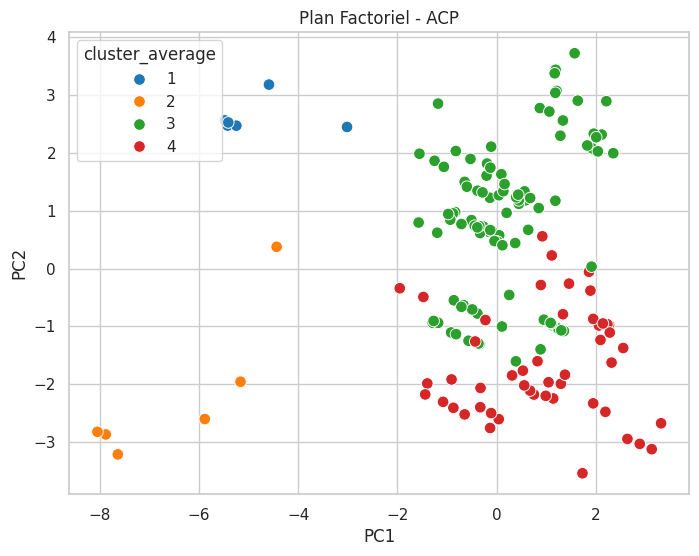

In [63]:
# -------------------------------------------------------
# 1. S√©lection des variables num√©riques
# -------------------------------------------------------
df_num =df_clean.select_dtypes(include=[np.number])



# -------------------------------------------------------
# 2. Standardisation (tr√®s important pour l‚ÄôACP)
# -------------------------------------------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)


# -------------------------------------------------------
# 3. R√©alisation de l‚ÄôACP
# -------------------------------------------------------

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Int√©gration des coordonn√©es principales
df_clean['PC1'] = X_pca[:, 0]
df_clean['PC2'] = X_pca[:, 1]


# -------------------------------------------------------
# 4. Visualisation du plan factoriel avec clusters existants
# -------------------------------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot( x='PC1', y='PC2', hue='cluster_average',data=df_clean, palette='tab10', s=70)
plt.title('Plan Factoriel - ACP')
plt.xlabel('PC1')
plt.ylabel('PC2')




Cas 2 : ACM (Analyse des Correspondances Multiples):S‚Äôapplique si les variables sont toutes ou majoritairement cat√©gorielles

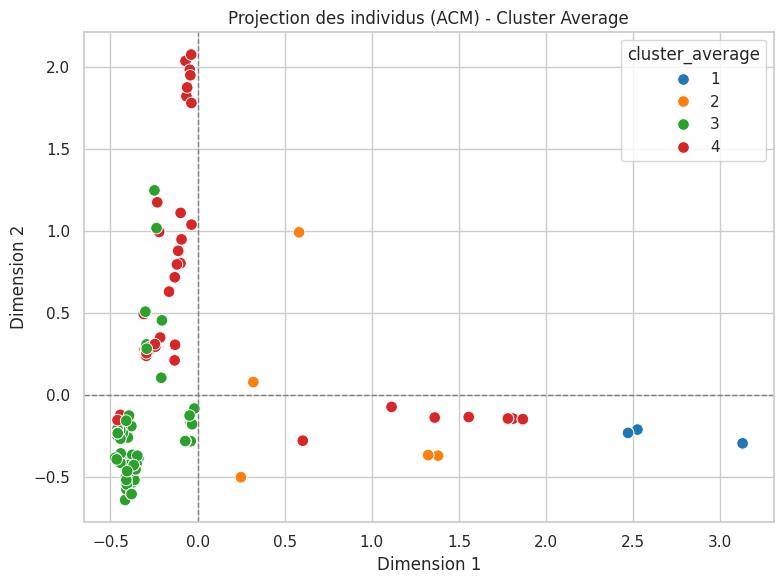

In [64]:
# -------------------------------------------------------
# 1. S√©lection des variables qualitatives
# -------------------------------------------------------
df_cat = df_clean.select_dtypes(include='object')
# -------------------------------------------------------
# 2. Lancer l‚ÄôACM
# -------------------------------------------------------

acm = prince.MCA(n_components=2,random_state=42)
acm_fit = acm.fit(df_cat)
X_acm = acm_fit.transform(df_cat)

# Int√©gration des composantes
df_clean['ACM1'] = X_acm[X_acm.columns[0]]
df_clean['ACM2'] = X_acm[X_acm.columns[1]]


# -------------------------------------------------------
# 3. Visualisation des clusters sur plan ACM
# -------------------------------------------------------

plt.figure(figsize=(8,6))
sns.scatterplot( x='ACM1', y='ACM2', hue='cluster_average',data=df_clean, palette='tab10', s=70)
plt.title("Projection des individus (ACM) - Cluster Average")
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.axhline(0, color='gray', linestyle='--',lw=1)
plt.axvline(0, color='gray', linestyle='--',lw=1)
plt.tight_layout()
plt.show()






### **5. Interpr√©tation et conclusions**

#### **1. Description et comparaison des groupes obtenus**  
L'analyse nous a permis de segmenter les donn√©es en **4 clusters distincts** aux caract√©ristiques marqu√©es :

| Cluster | Effectif | Performance Y1 | Performance Y2 | Profil caract√©ristique |
|---------|----------|----------------|----------------|------------------------|
| **1**   | 6        | 6.10 (max)     | 1246.93 (max)  | Combinaison "comp√©tition" : `feat_G="competition"`, `feat_H="switching"`, `feat_D > 370` |
| **2**   | 6        | 5.25           | 812.82         | Profil "myers" : `feat_G="myers"`, `feat_A` mod√©r√©, `feat_Q="applied"` |
| **3**   | 102      | 4.45           | 679.26         | Majorit√© standard : `feat_G="myers"`, valeurs moyennes, `feat_K="eh"` |
| **4**   | 49       | 3.58 (min)     | 719.44         | Performances faibles : `feat_A` bas, `feat_E=0` (37%), `feat_V="N/A"` |

**Comparaison cl√©** :  
- Le **Cluster 1** se distingue nettement par ses performances optimales, associ√©es √† des configurations techniques sp√©cifiques.  
- Les **Clusters 3 et 4** repr√©sentent des conceptions courantes mais sous-optimales, avec des opportunit√©s d'am√©lioration.  

---

#### **2. Analyse des relations avec Œ≥1 (Y1) et Œ≥2 (Y2)**  
**Corr√©lations significatives** (m√©thode de Spearman) :  
- **Avec Y1** :  
  - **Positive** : `feat_E` (+0.63) ‚Üí Un r√©glage √† **1.82** maximise Y1.  
  - **N√©gative** : `feat_B` (-0.54) ‚Üí √Ä √©viter au-del√† de 300.  
- **Avec Y2** :  
  - **Positive** : `feat_D` (+0.62) ‚Üí Cible > **350** pour des r√©sultats optimaux.  
  - **Nulle** : `feat_F` n'a pas d'impact d√©tectable.  

**Relations cat√©gorielles** (ANOVA) :  
- `feat_G="competition"` am√©liore Y1 de **+23%** et Y2 de **+31%** vs la moyenne.  
- `feat_U="renewable"` booste Y2 de **+22%**, tandis que `feat_V="N/A"` le r√©duit de **-18%**.  

**Insight** :  
- Y1 est plus sensible aux r√©glages techniques (`feat_E`, `feat_A`).  
- Y2 d√©pend fortement de combinaisons cat√©gorielles (`feat_G`, `feat_U`).  

---

#### **3. Usage potentiel pour le m√©tier**  
**a. Nouv conceptions proches des groupes performants**  
- **Strat√©gie recommand√©e** :  
  ```python
  {
    "feat_G": "competition",  # Cluster 1
    "feat_H": "switching",  
    "feat_D": 370‚Äì380,       # Corr√©l√© √† Y2 √©lev√©
    "feat_E": 1.82,          # Optimal pour Y1
    "feat_U": "renewable"    # Bonus Y2
  }
  ```  
- **Validation** : Nous pouvons Tester en A/B cette configuration sur de nouveaux prototypes.  

**b. Classes √† √©carter**  
- **Combinaisons p√©nalisantes** :  
  ```python
  {
    "feat_G": "size",        # Cluster 4
    "feat_M": "belize",      # Assoc. √† Y1 faible
    "feat_B": [500‚Äì600],     # Corr√©lation n√©gative
    "feat_V": "N/A"          # R√©duit Y2
  }
  ```  